In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('../DataOut/bus_running_times_feature_added_all_moddedDF.csv')
pivot_df1 = pd.read_csv('../DataOut/Clusters/norm_cluster_cluster_percentages.csv')
pivot_df2 = pd.read_csv('../DataOut/Clusters/TScluster_PCA_cluster_percentages.csv')
pivot_df3 = pd.read_csv('../DataOut/Clusters/TScluster_DTW_cluster_percentages.csv')
pivot_df4 = pd.read_csv('../DataOut/Clusters/TScluster_cluster_percentages.csv')
pivot_df5 =pd.read_csv('../DataOut/Clusters/TScluster_SDTW_cluster_percentages.csv')
pivot_df6 = pd.read_csv('../DataOut/Clusters/Normcluster_new_cluster_percentages.csv')

pivot_dfs=[[pivot_df1,'NormCluster'],[pivot_df2,'TSclusters km pca'],[pivot_df3,'TSclusters withdtw'],[pivot_df4,'TSclusters no dtw'],[pivot_df5,'TScluster_SDTW'],[pivot_df6,'NormCluster_new']]

In [3]:
pivot_df4

,deviceid,Cluster_1.0,Cluster_2.0,Cluster_3.0,Cluster_0.0
0,116,35.0,29.0,25.0,10.0
1,117,39.0,36.0,13.0,12.0
2,121,26.0,40.0,10.0,24.0
3,123,20.0,35.0,11.0,35.0
4,128,38.0,25.0,25.0,13.0
5,209,50.0,50.0,0.0,0.0
6,250,40.0,24.0,24.0,12.0
7,262,33.0,23.0,36.0,7.0
8,264,8.0,5.0,5.0,83.0
9,274,32.0,28.0,28.0,12.0


In [4]:
# # drop raws after 	'2022-11-01' from df
df = df[df['date']<='2022-11-01']

In [5]:
df[df['trip_id']==2]

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,...,rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
2877,2.0,116.0,1.0,1.0,2021-10-16,08:03:04,08:04:49,0 days 00:01:45,105.0,0.6261,...,102.0,102.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2878,2.0,116.0,1.0,2.0,2021-10-16,08:05:34,08:09:04,0 days 00:03:30,210.0,1.2808,...,249.0,249.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",45.0
2879,2.0,116.0,1.0,3.0,2021-10-16,08:09:04,08:16:15,0 days 00:07:11,431.0,2.1125,...,105.0,416.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2880,2.0,116.0,1.0,4.0,2021-10-16,08:16:15,08:20:36,0 days 00:04:21,261.0,1.5513,...,210.0,105.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2881,2.0,116.0,1.0,5.0,2021-10-16,08:20:36,08:22:21,0 days 00:01:45,105.0,0.8450,...,431.0,210.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2882,2.0,116.0,1.0,6.0,2021-10-16,08:22:21,08:26:57,0 days 00:04:36,276.0,1.3125,...,261.0,431.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2883,2.0,116.0,1.0,7.0,2021-10-16,08:27:57,08:28:57,0 days 00:01:00,60.0,0.3713,...,105.0,261.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",60.0
2884,2.0,116.0,1.0,8.0,2021-10-16,08:29:27,08:30:27,0 days 00:01:00,60.0,0.6245,...,276.0,105.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",30.0
2885,2.0,116.0,1.0,9.0,2021-10-16,08:30:27,08:31:12,0 days 00:00:45,45.0,0.2572,...,60.0,276.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2886,2.0,116.0,1.0,10.0,2021-10-16,08:33:27,08:36:57,0 days 00:03:30,210.0,1.2349,...,60.0,60.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",135.0


In [6]:
pivot_dfs

[[    deviceid  Cluster_3.0  Cluster_0.0  Cluster_1.0  Cluster_2.0
  0        116           84          8.0          4.0          4.0
  1        117           53          0.0          0.0         46.0
  2        121           50          3.0          5.0         42.0
  3        123           30          2.0          9.0         60.0
  4        128           32          3.0          5.0         60.0
  5        209           25          0.0          0.0         75.0
  6        250           43          2.0          3.0         52.0
  7        262           45          2.0          2.0         51.0
  8        264           49          4.0          5.0         42.0
  9        274           42          3.0          3.0         51.0
  10       275           67          2.0          1.0         30.0
  11       279           44          3.0          4.0         49.0
  12       294           41          2.0          5.0         52.0
  13       505           42          2.0          2.0         

In [7]:
# show all the columns in pandas dataframes
pd.set_option('display.max_columns', None)

In [8]:
df

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197627,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0
197628,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0
197629,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0
197630,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0


In [9]:
# # get raws where year is 2022 and moth is 10 and day higher than 1, this has seperate columns for year,mont,day
# df[(df['year']==2022) & (df['month']==10) & (df['day']>1)]

# print raws when date is afeter 2022-10-31
df[df['date'] > '2022-10-01']

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
156063,12471.0,1166.0,1.0,1.0,2022-10-02,06:41:37,06:44:22,0:02:45,165.0,0.63,6.0,6.50,1.0,0,0,37.0,113.0,106.0,102.0,113.0,113.0,113.0,113.0,113.0,6.0,2.0,10.0,19.1,0.0,10.4,Overcast,0.0
156064,12471.0,1166.0,1.0,2.0,2022-10-02,06:47:52,06:51:50,0:03:58,238.0,1.28,6.0,6.75,1.0,0,0,37.0,276.0,373.0,276.0,276.0,276.0,165.0,276.0,276.0,6.0,2.0,10.0,19.1,0.0,10.4,Overcast,210.0
156065,12471.0,1166.0,1.0,3.0,2022-10-02,06:51:50,07:00:12,0:08:22,502.0,2.11,6.0,6.75,1.0,0,0,37.0,546.0,476.0,578.0,546.0,546.0,238.0,165.0,546.0,6.0,2.0,10.0,19.1,0.0,10.4,Overcast,0.0
156066,12471.0,1166.0,1.0,4.0,2022-10-02,07:00:27,07:03:10,0:02:43,163.0,1.55,6.0,7.00,1.0,0,0,37.0,204.0,223.0,204.0,204.0,204.0,502.0,238.0,165.0,7.0,2.0,10.0,19.5,0.0,10.4,Overcast,15.0
156067,12471.0,1166.0,1.0,5.0,2022-10-02,07:03:10,07:04:55,0:01:45,105.0,0.84,6.0,7.00,1.0,0,0,37.0,123.0,135.0,123.0,123.0,123.0,163.0,502.0,238.0,7.0,2.0,10.0,19.5,0.0,10.4,Overcast,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197627,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.87,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0
197628,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.40,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0
197629,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.56,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0
197630,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.42,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0


In [10]:
# get a list of week_no in df
df['week_no'].unique().tolist()

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0]

In [11]:
df

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197627,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0
197628,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0
197629,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0
197630,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0


In [12]:
# get the number of unique date and conditions combination count in df

unique_combinations_count = df.groupby(['date', 'conditions']).size().reset_index(name='count')
unique_combinations_count


,date,conditions,count
0,2021-10-01,Overcast,54
1,2021-10-01,Partially cloudy,99
2,2021-10-01,"Rain, Overcast",79
3,2021-10-02,Partially cloudy,233
4,2021-10-02,"Rain, Overcast",44
...,...,...,...
889,2022-10-30,"Rain, Partially cloudy",37
890,2022-10-31,Overcast,235
891,2022-10-31,Partially cloudy,445
892,2022-10-31,Rain,76


In [13]:
# number of unique dates
unique_dates_count = df.groupby(['date']).size().reset_index(name='count')
unique_dates_count

,date,count
0,2021-10-01,232
1,2021-10-02,297
2,2021-10-03,197
3,2021-10-04,317
4,2021-10-05,302
...,...,...
266,2022-10-27,973
267,2022-10-28,947
268,2022-10-29,993
269,2022-10-30,432


In [14]:
# print nan values of each column
print(df.isnull().sum())

trip_id                0
deviceid               0
direction              0
segment                0
date                   0
start_time             0
end_time               0
run_time               0
run_time_in_seconds    0
length                 0
day_of_week            0
time_of_day            0
Sunday/holiday         0
saturday               0
weekday/end            0
week_no                0
rt(w-1)                0
rt(w-2)                0
rt(w-3)                0
rt(t-1)                0
rt(t-2)                0
rt(n-1)                0
rt(n-2)                0
rt(n-3)                0
hour_of_day            0
day                    0
month                  0
temp                   0
precip                 0
windspeed              0
conditions             0
dt(n-1)                0
dtype: int64


In [15]:
# drop raws where run_time_in_seconds has nan values
df = df.dropna(subset=['run_time_in_seconds'])

In [16]:
selected_deviceid = pivot_dfs[1][0]['deviceid'].unique()
selected_deviceid

array([ 116,  117,  121,  123,  128,  209,  250,  262,  264,  274,  275,
        279,  294,  505,  513,  550, 1143, 1166, 1358, 1377, 1408, 1410,
       1718, 1719], dtype=int64)

In [17]:
df = df[df['deviceid'].isin(selected_deviceid)]
df['deviceid'].unique()

array([ 262.,  274.,  123.,  279.,  264., 1408.,  294.,  128.,  505.,
        116.,  117., 1358., 1143.,  250.,  513., 1377., 1410.,  121.,
       1719., 1718.,  275.,  209.,  550., 1166.])

In [18]:
#unique values in conditions
print("Unique values in conditions: ", df['conditions'].unique())

Unique values in conditions:  ['Partially cloudy' 'Rain, Overcast' 'Overcast' 'Rain, Partially cloudy'
 'Clear' 'Rain']


In [19]:
def prepare(df):
    df['date'] = pd.to_datetime(df['date'])
    df['start_time'] = pd.to_datetime(df['start_time'],
                                    format='%H:%M:%S').dt.time

    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

    df.drop(['run_time'], axis=1,inplace = True)
    df.drop(['end_time'], axis=1,inplace = True)

    #replace ' partially cloudy' with 'partially cloudy'
    df['conditions'] = df['conditions'].replace(' Partially cloudy', 'Partially cloudy')


    from sklearn.preprocessing import OrdinalEncoder

    # Replace NaN values in the 'conditions' column with 'Unknown'
    df['conditions'].fillna('Unknown', inplace=True)

    conditions = ['Rain', 'Rain, Overcast', 'Rain, Partially cloudy', 'Overcast', 'Partially cloudy', 'Clear','Unknown']
    encoder = OrdinalEncoder(categories=[conditions])
    df['conditions_encoded'] = encoder.fit_transform(df[['conditions']])

    # Now, you can drop the original 'conditions' column if needed
    df = df.drop(['conditions'], axis=1)

    df['start_float'] = df['start_time'].apply(lambda x: x.hour + x.minute/60.0 + x.second/3600.0)

    # drop 
    df = df.drop(['start_time'], axis=1)

    # Drop the original date column
    df.drop('date', axis=1, inplace=True)
    
    return df

df=prepare(df)

In [20]:
# print a list of unique trip ids
trip_ids = df['trip_id'].unique()
# convert the list values to int
trip_ids = [int(x) for x in trip_ids]
print('unique trip ids: {}'.format(trip_ids))
# print length
print('length of unique trip ids: {}'.format(len(trip_ids)))

unique trip ids: [4890, 6541, 2370, 4892, 6543, 2372, 4894, 6545, 2374, 4896, 8000, 5908, 2376, 4898, 8002, 2378, 4900, 5910, 8004, 2380, 8006, 5912, 8008, 2382, 5914, 8010, 2384, 4902, 6547, 8012, 2386, 4904, 6549, 8014, 2388, 4906, 6551, 8016, 14368, 6553, 9133, 14370, 6555, 9135, 14372, 2392, 6557, 9137, 14374, 14375, 5916, 14377, 5918, 14379, 5920, 14381, 14382, 4908, 8018, 6559, 5922, 4910, 14384, 2394, 8020, 6561, 5924, 4912, 14386, 2396, 8022, 6563, 14387, 4914, 8024, 6565, 2398, 14389, 4916, 8026, 6567, 2400, 14391, 4918, 8028, 6569, 2402, 14393, 4920, 8030, 6571, 2404, 4921, 6573, 5926, 2406, 8032, 4923, 6575, 2408, 8034, 4925, 6577, 2410, 8036, 4927, 6579, 6581, 8038, 5928, 6583, 8040, 2412, 5930, 6585, 8042, 2414, 14394, 5932, 14396, 5934, 14398, 5936, 14400, 2416, 14401, 4928, 9139, 5938, 2418, 8044, 6587, 14403, 4930, 9141, 5940, 2420, 8046, 6589, 14405, 4932, 9143, 8048, 2422, 14406, 4934, 6591, 3465, 8050, 2424, 14408, 4936, 6593, 3467, 8052, 2426, 14410, 4938, 6595, 346

# XG boost Model


In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_rmse_dict = {}

def train_Model(df):
    # Split the data into two sets based on the week number for Code Block 1
    test_data = df[df['week_no'].isin([39, 40, 41, 42])]
    train_data = df[~df['week_no'].isin([39, 40, 41, 42])]

    X_train, X_test = train_data.drop(['run_time_in_seconds'], axis=1), test_data.drop(['run_time_in_seconds'], axis=1)
    y_train, y_test = train_data['run_time_in_seconds'], test_data['run_time_in_seconds']


    # Initialize XGBoost regressor for Code Block 1
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1)

    # Train the model on the training data for Code Block 1
    model.fit(X_train, y_train)

    # Make predictions on the testing data for Code Block 1
    predictions = model.predict(X_test)
    
        # Create a copy of the test data and add predicted values for Code Block 2
    predicted_df = test_data.copy()
    predicted_df['predicted_run_time'] = predictions

    # Evaluate the model's performance for Code Block 1
    mae1 = mean_absolute_error(y_test, predictions)
    rmse1 = np.sqrt(mean_squared_error(y_test, predictions))
    mape1 = np.mean(np.abs((y_test - predictions) / y_test)) * 100
    
    
    
    
    return model, predictions, predicted_df, mae1, rmse1,mape1

# XG boost without clusters

In [22]:
daf_no_clus = df[df['direction'] == 1].copy()

In [23]:
daf_no_clus

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,conditions_encoded,start_float
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.663611
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,2021,4.0,6.703333
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.761667
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,2021,4.0,6.901111
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.955278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168830,11205.0,513.0,1.0,11.0,145.0,1.1000,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.646111
168831,11205.0,513.0,1.0,12.0,146.0,1.3100,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31,10,22.2,0.0,4.3,0.0,2022,4.0,18.686389
168832,11205.0,513.0,1.0,13.0,149.0,1.1500,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31,10,22.2,0.0,4.3,7.0,2022,4.0,18.728889
168833,11205.0,513.0,1.0,14.0,80.0,0.8900,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.774444


In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features and target for Code Block 1
features1 = daf_no_clus.drop(['run_time_in_seconds'], axis=1)
target1 = daf_no_clus['run_time_in_seconds']

model1,predictions1,predicted_df1,mae1,rmse1,mape1 = train_Model(daf_no_clus)

mae_rmse_dict["without clusters"] = [mae1, rmse1,mape1,model1]

mae_rmse_dict["skip 1"] = " "

print(f'Mean Absolute Error without cluster: {mae1}')
print(f'Root Mean Square Error  without cluster: {rmse1}')
print(f'Mean Absolute Percentage Error without cluster: {mape1}')


Mean Absolute Error without cluster: 30.142899110558915
Root Mean Square Error  without cluster: 49.810205742015455
Mean Absolute Percentage Error without cluster: 17.730727515996296


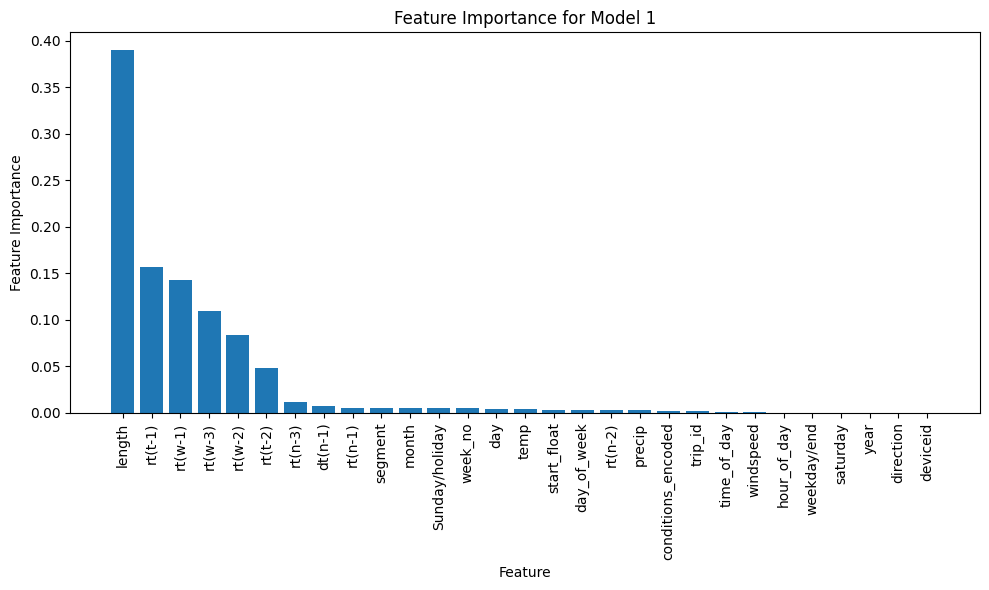

In [25]:
import matplotlib.pyplot as plt

# Get feature importances for Model 1
feature_importance1 = model1.feature_importances_

# Get the names of the features
feature_names1 = features1.columns

# Sort feature importances and feature names in descending order
sorted_idx1 = feature_importance1.argsort()[::-1]
feature_importance1 = feature_importance1[sorted_idx1]
feature_names1 = feature_names1[sorted_idx1]

# Create a bar graph for Model 1
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance1)), feature_importance1, align='center')
plt.xticks(range(len(feature_importance1)), feature_names1, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Model 1')
plt.tight_layout()
plt.show()


# XG boost with segment clusters

In [26]:
daf_no_clus = df.copy()

In [27]:
daf_no_clus

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,conditions_encoded,start_float
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.663611
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,2021,4.0,6.703333
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.761667
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,2021,4.0,6.901111
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.955278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197627,3462.0,123.0,2.0,28.0,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31,10,22.2,0.0,4.3,9.0,2022,4.0,18.762222
197628,3462.0,123.0,2.0,29.0,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.793889
197629,3462.0,123.0,2.0,30.0,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31,10,22.2,0.0,4.3,33.0,2022,4.0,18.848889
197630,3462.0,123.0,2.0,31.0,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.946667


In [28]:
# read '../DataOut/bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test.csv'
bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test = pd.read_csv('../DataOut/bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test.csv')
bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test


,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),Kmeans_cluster,year,conditions_encoded,start_float
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,2.0,2021,4.0,6.663611
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,2.0,2021,4.0,6.703333
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,2.0,2021,4.0,6.761667
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,1.0,2021,4.0,6.901111
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,2.0,2021,4.0,6.955278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193772,3462.0,123.0,2.0,28.0,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31,10,22.2,0.0,4.3,9.0,2.0,2022,4.0,18.762222
193773,3462.0,123.0,2.0,29.0,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31,10,22.2,0.0,4.3,15.0,2.0,2022,4.0,18.793889
193774,3462.0,123.0,2.0,30.0,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31,10,22.2,0.0,4.3,33.0,2.0,2022,4.0,18.848889
193775,3462.0,123.0,2.0,31.0,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31,10,22.2,0.0,4.3,15.0,1.0,2022,4.0,18.946667


In [1]:
daf_no_clus = bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test[bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test['direction'] == 1].copy()
daf_no_clus

NameError: name 'bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test' is not defined

In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features and target for Code Block 1
features1 = daf_no_clus.drop(['run_time_in_seconds'], axis=1)
target1 = daf_no_clus['run_time_in_seconds']

model1,predictions1,predicted_df1,mae1,rmse1,mape1 = train_Model(daf_no_clus)

mae_rmse_dict["with segment clusters"] = [mae1, rmse1,mape1,model1]

mae_rmse_dict["skip 1"] = " "

print(f'Mean Absolute Error with segment cluster: {mae1}')
print(f'Root Mean Square Error  with segment cluster: {rmse1}')
print(f'Mean Absolute Percentage Error with segment cluster: {mape1}')


Mean Absolute Error with segment cluster: 29.462383387431622
Root Mean Square Error  with segment cluster: 49.08387375557081
Mean Absolute Percentage Error with segment cluster: 17.18719146902769


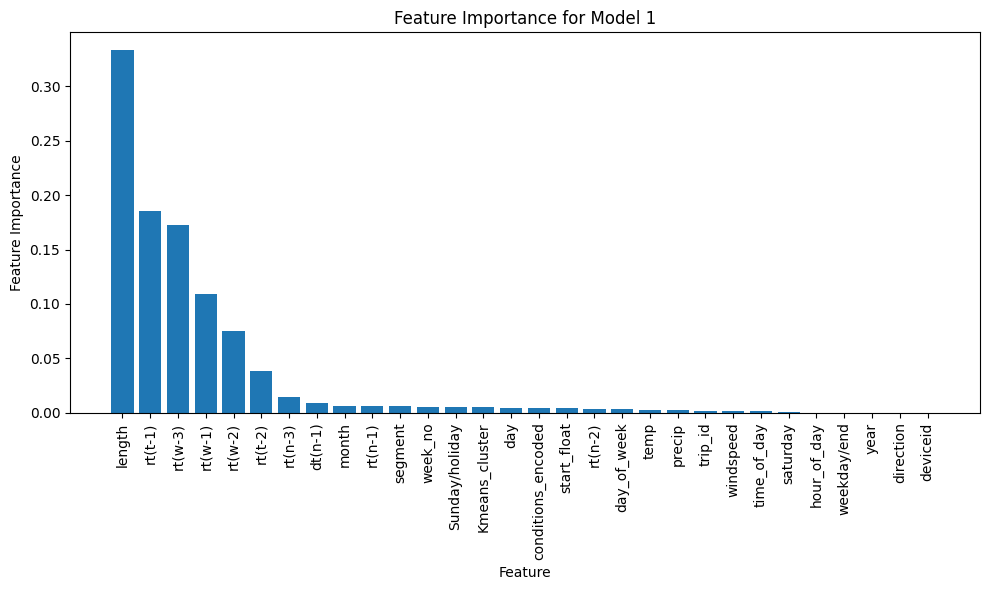

In [31]:
import matplotlib.pyplot as plt

# Get feature importances for Model 1
feature_importance1 = model1.feature_importances_

# Get the names of the features
feature_names1 = features1.columns

# Sort feature importances and feature names in descending order
sorted_idx1 = feature_importance1.argsort()[::-1]
feature_importance1 = feature_importance1[sorted_idx1]
feature_names1 = feature_names1[sorted_idx1]

# Create a bar graph for Model 1
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance1)), feature_importance1, align='center')
plt.xticks(range(len(feature_importance1)), feature_names1, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Model 1')
plt.tight_layout()
plt.show()


# XG boost with segment clusters

In [32]:
daf_no_clus = df.copy()

In [33]:
daf_no_clus

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,conditions_encoded,start_float
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.663611
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,2021,4.0,6.703333
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.761667
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,2021,4.0,6.901111
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.955278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197627,3462.0,123.0,2.0,28.0,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31,10,22.2,0.0,4.3,9.0,2022,4.0,18.762222
197628,3462.0,123.0,2.0,29.0,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.793889
197629,3462.0,123.0,2.0,30.0,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31,10,22.2,0.0,4.3,33.0,2022,4.0,18.848889
197630,3462.0,123.0,2.0,31.0,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.946667


In [34]:
# read '../DataOut/bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test.csv'
bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test = pd.read_csv('../DataOut/bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test.csv')
bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test


,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),Kmeans_cluster,year,conditions_encoded,start_float
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,2.0,2021,4.0,6.663611
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,2.0,2021,4.0,6.703333
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,2.0,2021,4.0,6.761667
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,1.0,2021,4.0,6.901111
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,2.0,2021,4.0,6.955278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193772,3462.0,123.0,2.0,28.0,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31,10,22.2,0.0,4.3,9.0,2.0,2022,4.0,18.762222
193773,3462.0,123.0,2.0,29.0,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31,10,22.2,0.0,4.3,15.0,2.0,2022,4.0,18.793889
193774,3462.0,123.0,2.0,30.0,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31,10,22.2,0.0,4.3,33.0,2.0,2022,4.0,18.848889
193775,3462.0,123.0,2.0,31.0,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31,10,22.2,0.0,4.3,15.0,1.0,2022,4.0,18.946667


In [35]:
# open csv avg_for_devID_time_of_day_and_segment.csv
avg_for_devID_time_of_day_and_segment = pd.read_csv('../DataOut/avg_for_devID_time_of_day_and_segment.csv')
# rename avg_for_devID_time_of_day_and_segment time_of_day column to dayparts
avg_for_devID_time_of_day_and_segment.rename(columns={'time_of_day': 'dayparts'}, inplace=True)
avg_for_devID_time_of_day_and_segment

,deviceid,dayparts,segment,speed,acceleration,radial_acceleration,throttle_count,break_count
0,116.0,morning,0,3.396083,0.002191,0.175434,2.414347,0.944844
1,116.0,morning,1,6.617755,-0.022759,0.354919,1.444820,1.453245
2,116.0,morning,2,8.190476,0.021226,0.536539,3.344290,1.696848
3,116.0,morning,3,9.379045,-0.009781,0.627968,7.637994,6.356376
4,116.0,morning,4,13.073141,-0.028369,0.431310,4.018528,3.886830
...,...,...,...,...,...,...,...,...
1243,1719.0,night,11,14.915066,-0.033021,2.632016,27.040000,27.440000
1244,1719.0,night,12,15.493895,-0.052188,3.027405,33.460000,34.220000
1245,1719.0,night,13,16.662977,-0.086997,3.845429,30.980000,32.360000
1246,1719.0,night,14,16.407857,-0.095801,3.275239,20.600000,21.820000


In [36]:
# Create a new 'time_of_day' column based on the time component
bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test['dayparts'] = pd.cut(
    bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test['hour_of_day'],
    bins=[0, 6, 19, 24],
    labels=['morning', 'day', 'night'],
    include_lowest=True
)

In [37]:
# add data from avg_for_devID_time_of_day_and_segment to daf_with_features based on deviceid and dayparts
bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test = pd.merge(bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test, avg_for_devID_time_of_day_and_segment, on=['deviceid', 'dayparts','segment'], how='left')

In [38]:
bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),Kmeans_cluster,year,conditions_encoded,start_float,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,2.0,2021,4.0,6.663611,morning,6.551622,-0.263065,0.289582,1.333333,0.333333
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,2.0,2021,4.0,6.703333,morning,10.318498,-0.020071,0.876211,3.000000,1.000000
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,2.0,2021,4.0,6.761667,morning,9.510959,-0.306166,0.668537,7.500000,8.250000
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,1.0,2021,4.0,6.901111,morning,12.014774,-0.072601,0.425698,3.250000,3.750000
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,2.0,2021,4.0,6.955278,morning,14.626720,-0.645813,0.374014,1.250000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193772,3462.0,123.0,2.0,28.0,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31,10,22.2,0.0,4.3,9.0,2.0,2022,4.0,18.762222,day,NaN,NaN,NaN,NaN,NaN
193773,3462.0,123.0,2.0,29.0,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31,10,22.2,0.0,4.3,15.0,2.0,2022,4.0,18.793889,day,NaN,NaN,NaN,NaN,NaN
193774,3462.0,123.0,2.0,30.0,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31,10,22.2,0.0,4.3,33.0,2.0,2022,4.0,18.848889,day,NaN,NaN,NaN,NaN,NaN
193775,3462.0,123.0,2.0,31.0,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31,10,22.2,0.0,4.3,15.0,1.0,2022,4.0,18.946667,day,NaN,NaN,NaN,NaN,NaN


In [39]:
# print the unique device ids of rows where speed value is nan
bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test[bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test['speed'].isnull()]['deviceid'].unique()

array([ 274.,  123.,  262.,  279.,  264.,  294., 1408.,  128.,  505.,
        116.,  117., 1358., 1143.,  250.,  513., 1377., 1410.,  121.,
       1409.,  209., 1719., 1718.,  275., 1166.,  284.])

In [40]:
# get the unique device ids in avg_for_devID_time_of_day_and_segment
avg_for_devID_time_of_day_and_segment['deviceid'].unique()

array([ 116.,  117.,  121.,  123.,  128.,  209.,  250.,  262.,  264.,
        274.,  275.,  279.,  284.,  294.,  505.,  513.,  550., 1143.,
       1166., 1358., 1377., 1408., 1409., 1410., 1718., 1719.])

In [41]:
daf_no_clus = bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test[bus_running_times_feature_added_all_with_Kmeans_cluster_pred_for_test['direction'] == 1].copy()
daf_no_clus

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),Kmeans_cluster,year,conditions_encoded,start_float,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,2.0,2021,4.0,6.663611,morning,6.551622,-0.263065,0.289582,1.333333,0.333333
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,2.0,2021,4.0,6.703333,morning,10.318498,-0.020071,0.876211,3.000000,1.000000
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,2.0,2021,4.0,6.761667,morning,9.510959,-0.306166,0.668537,7.500000,8.250000
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,1.0,2021,4.0,6.901111,morning,12.014774,-0.072601,0.425698,3.250000,3.750000
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,2.0,2021,4.0,6.955278,morning,14.626720,-0.645813,0.374014,1.250000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181758,11205.0,513.0,1.0,11.0,145.0,1.1000,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31,10,22.2,0.0,4.3,15.0,2.0,2022,4.0,18.646111,day,11.085682,-0.358022,0.450297,2.567742,2.974194
181759,11205.0,513.0,1.0,12.0,146.0,1.3100,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31,10,22.2,0.0,4.3,0.0,3.0,2022,4.0,18.686389,day,11.666578,-0.357763,0.666164,3.058824,3.568627
181760,11205.0,513.0,1.0,13.0,149.0,1.1500,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31,10,22.2,0.0,4.3,7.0,2.0,2022,4.0,18.728889,day,10.933378,-0.493207,0.616278,2.470199,2.980132
181761,11205.0,513.0,1.0,14.0,80.0,0.8900,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31,10,22.2,0.0,4.3,15.0,2.0,2022,4.0,18.774444,day,11.332955,-0.294113,0.489491,1.697368,1.868421


In [43]:
# Create a custom mapping dictionary
dayparts_mapping = {'morning': 0, 'day': 1, 'night': 2}

# Use the map function to label encode 'dayparts' column
daf_no_clus['dayparts'] = daf_no_clus['dayparts'].map(dayparts_mapping)

In [44]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features and target for Code Block 1
features1 = daf_no_clus.drop(['run_time_in_seconds'], axis=1)
target1 = daf_no_clus['run_time_in_seconds']

model1,predictions1,predicted_df1,mae1,rmse1,mape1 = train_Model(daf_no_clus)

mae_rmse_dict["with segment clusters with features"] = [mae1, rmse1,mape1,model1]

mae_rmse_dict["skip 1"] = " "

print(f'Mean Absolute Error with segment cluster with features: {mae1}')
print(f'Root Mean Square Error  with segment cluster with features: {rmse1}')
print(f'Mean Absolute Percentage Error with segment cluster with features: {mape1}')


Mean Absolute Error with segment cluster with features: 29.177174717317
Root Mean Square Error  with segment cluster with features: 48.35050991791467
Mean Absolute Percentage Error with segment cluster with features: 17.35873979872216


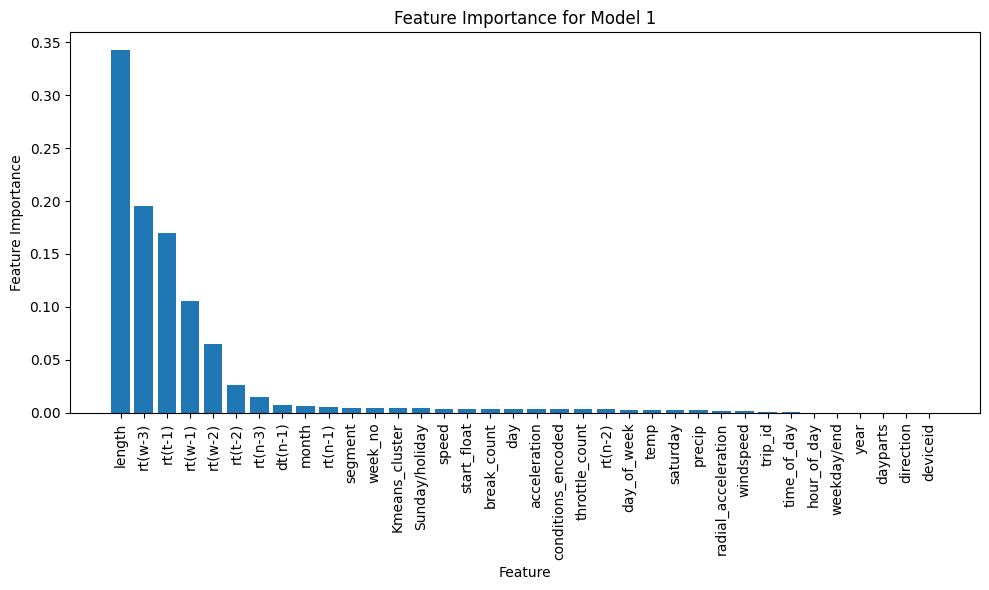

In [45]:
import matplotlib.pyplot as plt

# Get feature importances for Model 1
feature_importance1 = model1.feature_importances_

# Get the names of the features
feature_names1 = features1.columns

# Sort feature importances and feature names in descending order
sorted_idx1 = feature_importance1.argsort()[::-1]
feature_importance1 = feature_importance1[sorted_idx1]
feature_names1 = feature_names1[sorted_idx1]

# Create a bar graph for Model 1
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance1)), feature_importance1, align='center')
plt.xticks(range(len(feature_importance1)), feature_names1, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Model 1')
plt.tight_layout()
plt.show()


# XG boost with clusters

In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# models dictionary
models = {}

# Loop for Code Block 2
for df_tup in pivot_dfs:
    daf_with_clus = df[df['direction'] == 1].copy()
    pivot_df = df_tup[0]
    cluster_method = df_tup[1]
    
    # Merge the dataframes using the device_id column
    new_df = pd.merge(daf_with_clus, pivot_df, on='deviceid', how='inner')
    new_df = new_df[new_df['direction'] == 1]
    
    # Define features and target for Code Block 2
    features2 = new_df.drop(['run_time_in_seconds'], axis=1)
    target2 = new_df['run_time_in_seconds']
    
    model2,predictions2,predicted_df2,mae2,rmse2,mape2 = train_Model(new_df)
    
    models[cluster_method] = model2
    
    mae_rmse_dict[f"{cluster_method} with clusters"] = [mae2, rmse2,mape2,model2]
    
    print(f'Mean Absolute Error {cluster_method} : {mae2}')
    print(f'Root Mean Square Error {cluster_method} : {rmse2}')
    print(f'Mean Absolute Percentage Error {cluster_method} : {mape2}')
    print(" ")
    
mae_rmse_dict["skip 2"] = " "


Mean Absolute Error NormCluster : 29.928383145685064
Root Mean Square Error NormCluster : 49.49565483789443
Mean Absolute Percentage Error NormCluster : 17.540648996145254
 
Mean Absolute Error TSclusters km pca : 30.141396533704786
Root Mean Square Error TSclusters km pca : 50.04765509964148
Mean Absolute Percentage Error TSclusters km pca : 17.60257079687164
 
Mean Absolute Error TSclusters withdtw : 33.14999006661502
Root Mean Square Error TSclusters withdtw : 53.830964830868886
Mean Absolute Percentage Error TSclusters withdtw : 19.835052874330092
 
Mean Absolute Error TSclusters no dtw : 30.234525926563837
Root Mean Square Error TSclusters no dtw : 49.851330806584585
Mean Absolute Percentage Error TSclusters no dtw : 17.83853573033533
 
Mean Absolute Error TScluster_SDTW : 33.51494017839432
Root Mean Square Error TScluster_SDTW : 55.15118498513271
Mean Absolute Percentage Error TScluster_SDTW : 20.517664692000555
 
Mean Absolute Error NormCluster_new : 33.02250117497011
Root Mean 

In [47]:
#without clusters :
# Mean Absolute Error (Code Block 1): 32.854974080215804
# Root Mean Square Error (Code Block 1): 53.20377299850515

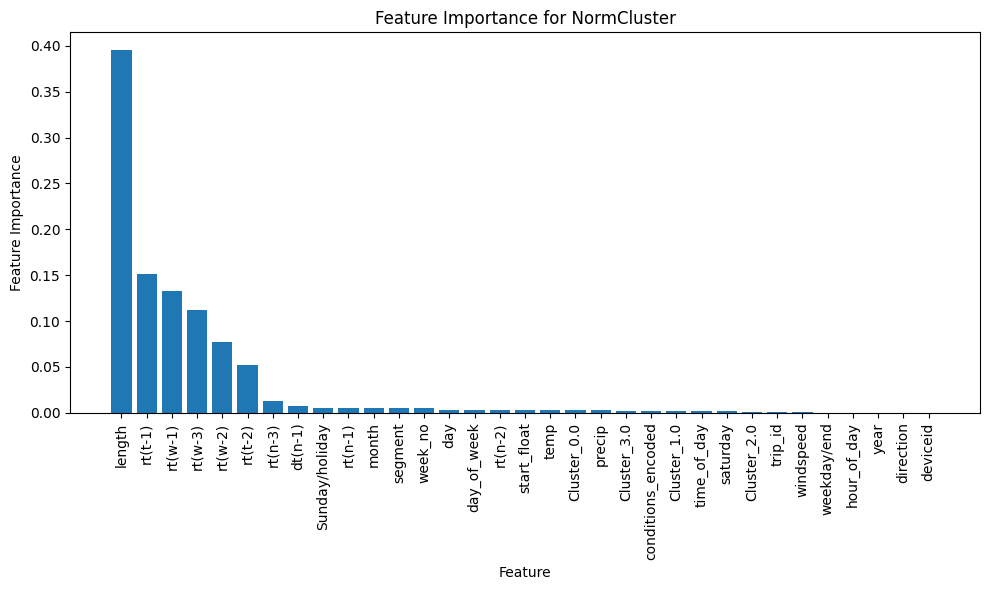

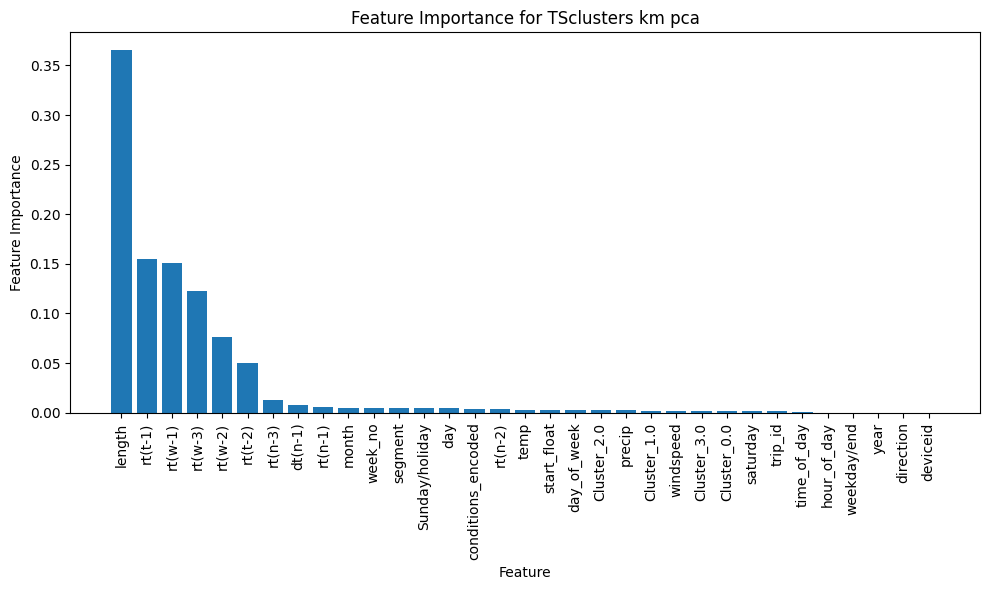

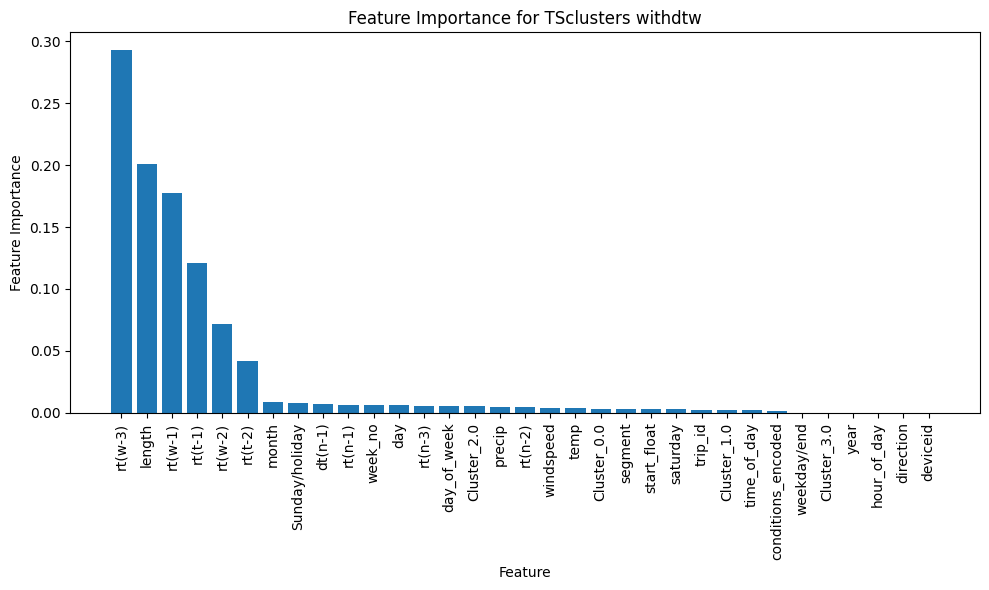

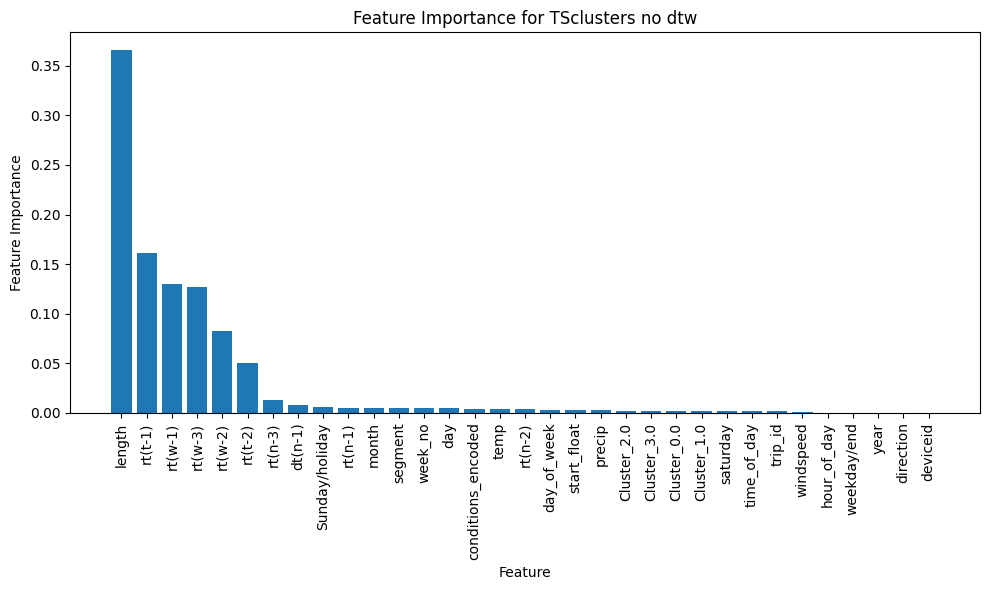

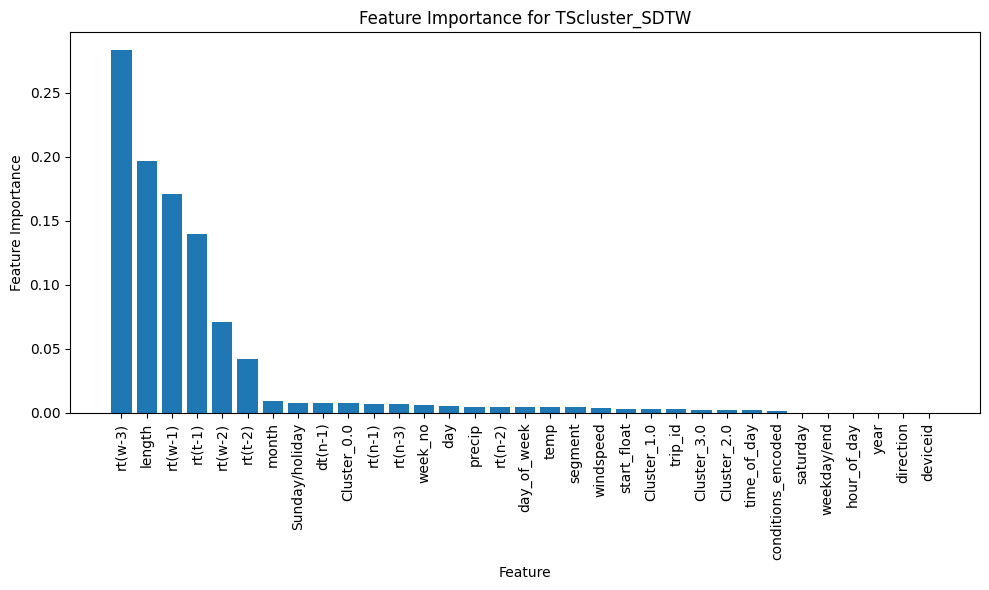

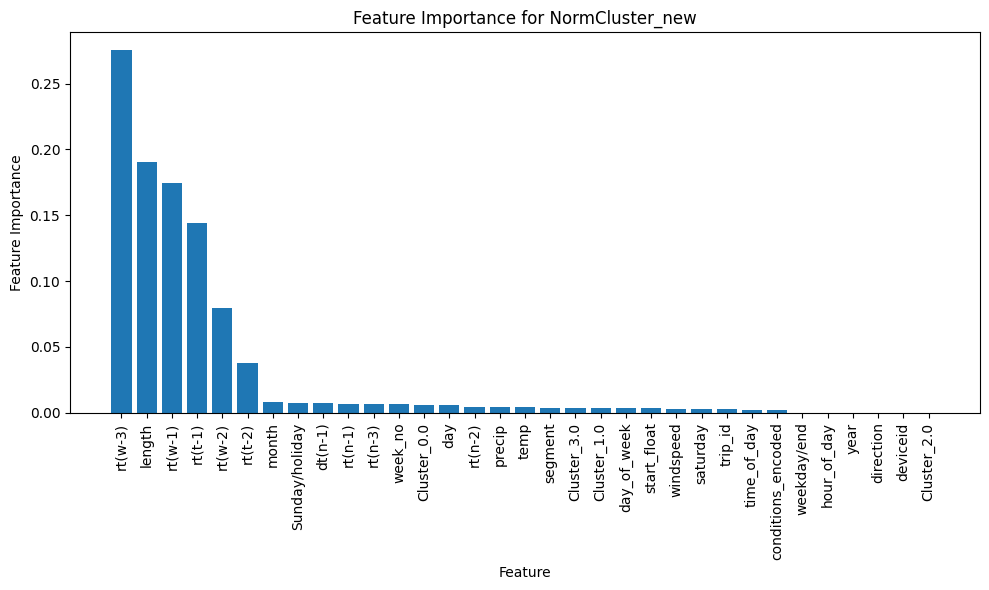

In [48]:
import matplotlib.pyplot as plt

for modelname, model in models.items():
    # Get feature importances for Model 2
    feature_importance2 = model.feature_importances_

    # Get the names of the features
    feature_names2 = features2.columns

    # Sort feature importances and feature names in descending order
    sorted_idx2 = feature_importance2.argsort()[::-1]
    feature_importance2 = feature_importance2[sorted_idx2]
    feature_names2 = feature_names2[sorted_idx2]

    # Create a bar graph for Model 2
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance2)), feature_importance2, align='center')
    plt.xticks(range(len(feature_importance2)), feature_names2, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title(f'Feature Importance for {modelname}')
    plt.tight_layout()
    plt.show()


In [49]:
predicted_df2.to_csv('../DataOut/runtime_with_clusters_predictions.csv', index=False)

# XG boost with new features

In [50]:
daf_with_features = df[df['direction'] == 1].copy()

In [51]:
# load csv '../DataOut/means_and_maxima_minima_counts.csv'
means_and_maxima_minima_counts = pd.read_csv('../DataOut/means_and_maxima_minima_counts.csv')

In [52]:
means_and_maxima_minima_counts

,trip_id,segment,deviceid_x,speed,acceleration,radial_acceleration,deviceid_y,throttle_count,break_count
0,2.0,0,116.0,1.524584,0.029645,0.017093,116,3,0
1,2.0,1,116.0,7.636540,-0.087422,0.534319,116,1,1
2,2.0,2,116.0,7.883371,0.026398,0.490645,116,1,0
3,2.0,3,116.0,8.713790,0.004566,0.612571,116,8,5
4,2.0,4,116.0,11.819059,-0.057995,0.444268,116,4,5
...,...,...,...,...,...,...,...,...,...
107141,15891.0,11,1719.0,18.699291,-0.152594,3.907671,1719,35,35
107142,15891.0,12,1719.0,16.473428,-0.152041,2.910918,1719,33,35
107143,15891.0,13,1719.0,17.021033,-0.189728,3.823469,1719,35,37
107144,15891.0,14,1719.0,10.994308,-0.172396,2.093276,1719,24,26


In [53]:
# get the number of unique trip ids
unique_trip_ids = means_and_maxima_minima_counts['trip_id'].unique()
len(unique_trip_ids)

6793

In [54]:
# drop deviceid_x and deviceid_y columns from means_and_maxima_minima_counts
means_and_maxima_minima_counts.drop(['deviceid_x', 'deviceid_y'], axis=1, inplace=True)

In [55]:
# open csv avg_for_devID_time_of_day_and_segment.csv
avg_for_devID_time_of_day_and_segment = pd.read_csv('../DataOut/avg_for_devID_time_of_day_and_segment.csv')
# rename avg_for_devID_time_of_day_and_segment time_of_day column to dayparts
avg_for_devID_time_of_day_and_segment.rename(columns={'time_of_day': 'dayparts'}, inplace=True)
avg_for_devID_time_of_day_and_segment

,deviceid,dayparts,segment,speed,acceleration,radial_acceleration,throttle_count,break_count
0,116.0,morning,0,3.396083,0.002191,0.175434,2.414347,0.944844
1,116.0,morning,1,6.617755,-0.022759,0.354919,1.444820,1.453245
2,116.0,morning,2,8.190476,0.021226,0.536539,3.344290,1.696848
3,116.0,morning,3,9.379045,-0.009781,0.627968,7.637994,6.356376
4,116.0,morning,4,13.073141,-0.028369,0.431310,4.018528,3.886830
...,...,...,...,...,...,...,...,...
1243,1719.0,night,11,14.915066,-0.033021,2.632016,27.040000,27.440000
1244,1719.0,night,12,15.493895,-0.052188,3.027405,33.460000,34.220000
1245,1719.0,night,13,16.662977,-0.086997,3.845429,30.980000,32.360000
1246,1719.0,night,14,16.407857,-0.095801,3.275239,20.600000,21.820000


In [56]:
import pandas as pd

# Assuming 'hour_of_day' column is a string in the format 'YYYY-MM-DD HH:mm:ss'
# If it's not, adjust the format accordingly


# Create a new 'time_of_day' column based on the time component
daf_with_features['dayparts'] = pd.cut(
    daf_with_features['hour_of_day'],
    bins=[0, 6, 19, 24],
    labels=['morning', 'day', 'night'],
    include_lowest=True
)

# Now, 'time_of_day' will be 'morning' for times before 6:00 AM,
# 'day' for times between 6:00 AM and 7:00 PM, and 'night' for times after 7:00 PM


In [57]:
# add data from avg_for_devID_time_of_day_and_segment to daf_with_features based on deviceid and dayparts
daf_with_features = pd.merge(daf_with_features, avg_for_devID_time_of_day_and_segment, on=['deviceid', 'dayparts','segment'], how='left')

In [58]:
# # # left join daf_with_features with means_and_maxima_minima_counts on trip_id and segment
# daf_with_features_unPerTripid = pd.merge(daf_with_features, means_and_maxima_minima_counts, on=['trip_id', 'segment'], how='left')

In [59]:
# daf_with_features_unPerTripid

In [60]:
# # get the number of unique trip ids
# unique_trip_ids = daf_with_features_unPerTripid['trip_id'].unique()
# len(unique_trip_ids)

In [61]:
# # count the num of Nan in each column
# daf_with_features_unPerTripid.isnull().sum()

In [62]:
# # save csv
# daf_with_features_unPerTripid.to_csv(f'../DataOut/fullDataset_with_Newfeatures.csv', index=False)

In [63]:
daf_with_features.head(20)

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,conditions_encoded,start_float,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,4.0,6.663611,morning,6.551622,-0.263065,0.289582,1.333333,0.333333
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.000,6.1,74.0,2021,4.0,6.703333,morning,10.318498,-0.020071,0.876211,3.000000,1.000000
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,4.0,6.761667,morning,9.510959,-0.306166,0.668537,7.500000,8.250000
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.000,6.1,6.0,2021,4.0,6.901111,morning,12.014774,-0.072601,0.425698,3.250000,3.750000
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,4.0,6.955278,morning,14.626720,-0.645813,0.374014,1.250000,1.000000
5,4890.0,262.0,1.0,6.0,210.0,1.3125,4.0,7.00,0.0,0,1,1.0,220.0,220.0,220.0,220.0,220.0,97.0,195.0,496.0,7.0,1,10,20.7,0.000,6.8,211.0,2021,4.0,7.040833,day,9.581184,-0.229442,0.686083,3.805740,4.430464
6,4890.0,262.0,1.0,7.0,45.0,0.3713,4.0,7.00,0.0,0,1,1.0,39.0,39.0,39.0,39.0,39.0,210.0,97.0,195.0,7.0,1,10,20.7,0.000,6.8,35.0,2021,4.0,7.108889,day,9.812782,-0.306383,0.281794,0.287611,0.469027
7,4890.0,262.0,1.0,8.0,99.0,0.6245,4.0,7.00,0.0,0,1,1.0,74.0,74.0,74.0,74.0,74.0,45.0,210.0,97.0,7.0,1,10,20.7,0.000,6.8,25.0,2021,4.0,7.128333,day,11.072977,-0.402204,0.825457,1.099338,1.256071
8,4890.0,262.0,1.0,9.0,34.0,0.2572,4.0,7.00,0.0,0,1,1.0,26.0,26.0,26.0,26.0,26.0,99.0,45.0,210.0,7.0,1,10,20.7,0.000,6.8,23.0,2021,4.0,7.162222,day,9.349031,-0.740181,0.360986,0.065934,0.116484
9,4890.0,262.0,1.0,10.0,149.0,1.2349,4.0,7.00,0.0,0,1,1.0,157.0,157.0,157.0,157.0,157.0,34.0,99.0,45.0,7.0,1,10,20.7,0.000,6.8,44.0,2021,4.0,7.183889,day,11.403115,-0.224835,0.337363,2.758242,2.846154


In [64]:
# Create a custom mapping dictionary
dayparts_mapping = {'morning': 0, 'day': 1, 'night': 2}

# Use the map function to label encode 'dayparts' column
daf_with_features['dayparts'] = daf_with_features['dayparts'].map(dayparts_mapping)


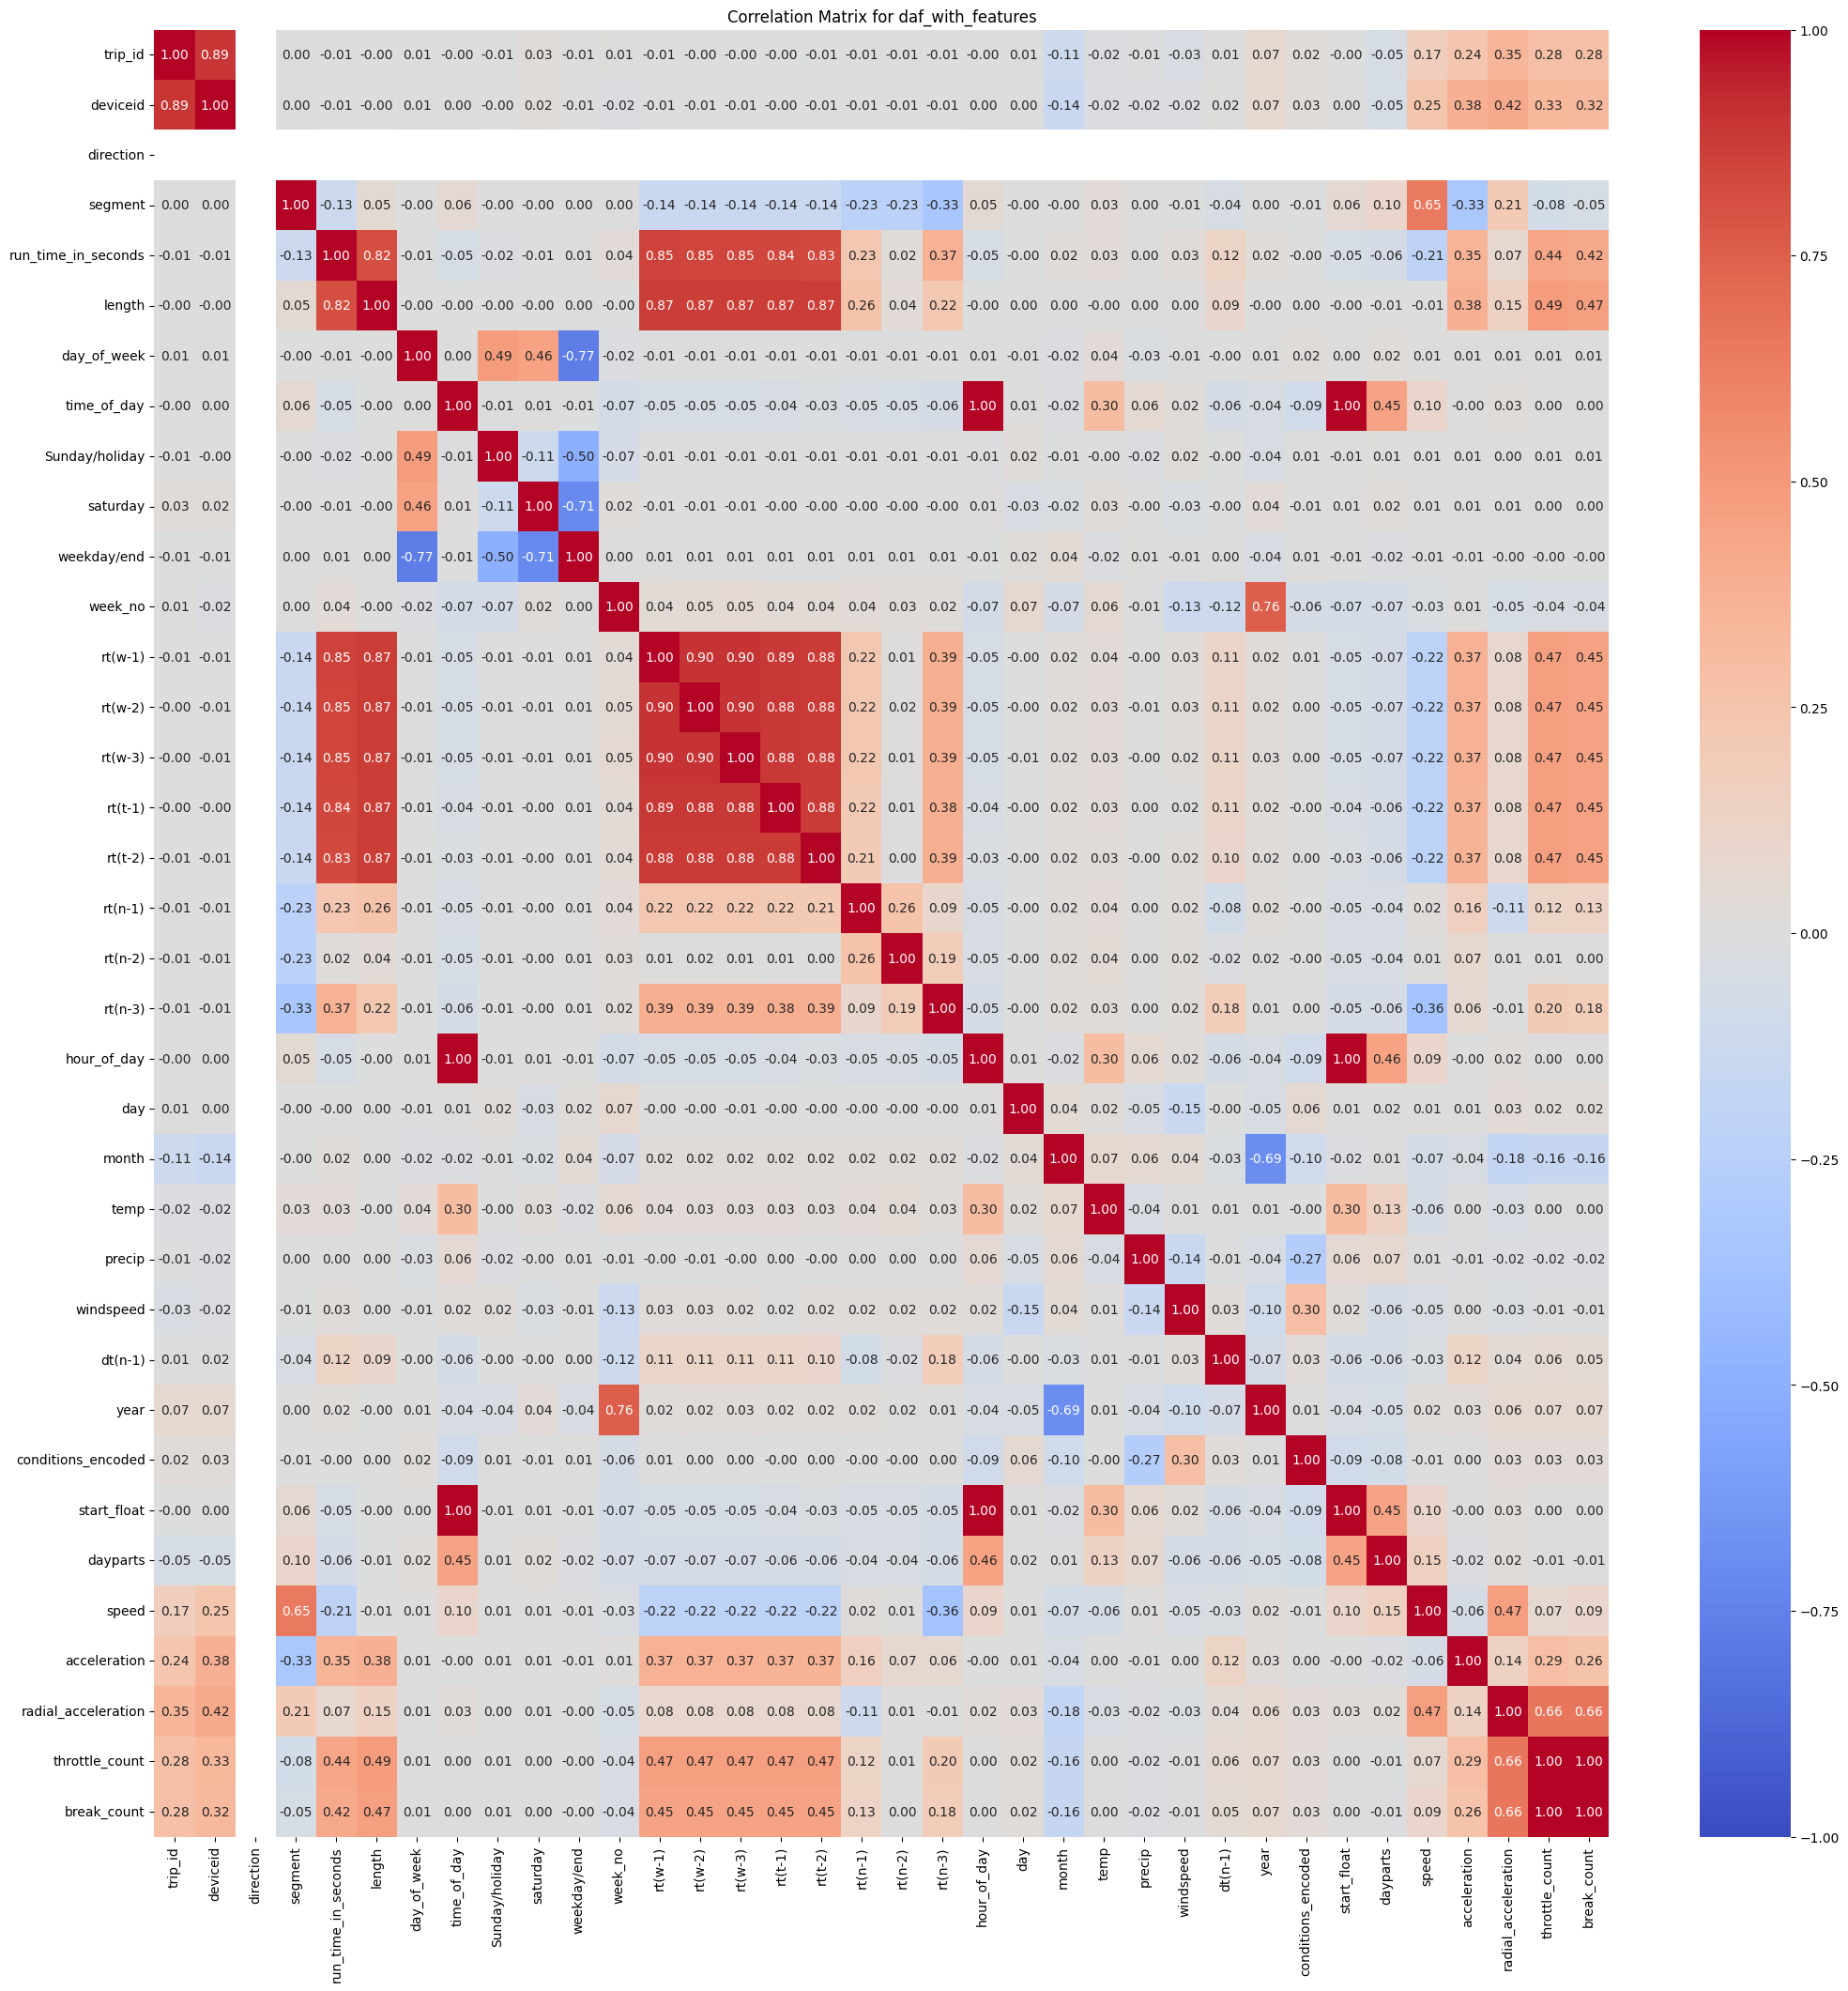

In [65]:
# visulaize a corelation matrix for daf_with_features dataframe
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = daf_with_features.corr()

# Create a heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix for daf_with_features')
plt.show()


In [66]:
daf_with_features

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,conditions_encoded,start_float,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.663611,0,6.551622,-0.263065,0.289582,1.333333,0.333333
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,2021,4.0,6.703333,0,10.318498,-0.020071,0.876211,3.000000,1.000000
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.761667,0,9.510959,-0.306166,0.668537,7.500000,8.250000
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,2021,4.0,6.901111,0,12.014774,-0.072601,0.425698,3.250000,3.750000
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.955278,0,14.626720,-0.645813,0.374014,1.250000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100388,11205.0,513.0,1.0,11.0,145.0,1.1000,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.646111,1,11.085682,-0.358022,0.450297,2.567742,2.974194
100389,11205.0,513.0,1.0,12.0,146.0,1.3100,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31,10,22.2,0.0,4.3,0.0,2022,4.0,18.686389,1,11.666578,-0.357763,0.666164,3.058824,3.568627
100390,11205.0,513.0,1.0,13.0,149.0,1.1500,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31,10,22.2,0.0,4.3,7.0,2022,4.0,18.728889,1,10.933378,-0.493207,0.616278,2.470199,2.980132
100391,11205.0,513.0,1.0,14.0,80.0,0.8900,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.774444,1,11.332955,-0.294113,0.489491,1.697368,1.868421


In [67]:
# drop highly correlated columns
# daf_with_features.drop(['hour_of_day', 'break_count', 'dayparts'], axis=1, inplace=True)

In [68]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features and target for Code Block 3
features3 = daf_with_features.drop(['run_time_in_seconds'], axis=1)
target3 = daf_with_features['run_time_in_seconds']

model3,predictions3,predicted_df3,mae3,rmse3,mape3 = train_Model(daf_with_features)

mae_rmse_dict["with new features"] = [mae3, rmse3,mape3,model3]
mae_rmse_dict["skip 3"] = " "

print(f'Mean Absolute Error (Code Block 3): {mae3}')
print(f'Root Mean Square Error (Code Block 3): {rmse3}')
print(f'Mean Absolute Percentage Error (Code Block 3): {mape3}')


Mean Absolute Error (Code Block 3): 29.675764895818006
Root Mean Square Error (Code Block 3): 49.310126884592805
Mean Absolute Percentage Error (Code Block 3): 17.428808610170627


In [69]:
# without new features

# Mean Absolute Error (Code Block 1): 32.854974080215804
# Root Mean Square Error (Code Block 1): 53.20377299850515

# with clusters

# Mean Absolute Error TSclusters km pca : 32.749991629882295
# Root Mean Square Error TSclusters km pca : 53.16101130982849

# with new features 

# Mean Absolute Error (Code Block 3): 30.52582188898867
# Root Mean Square Error (Code Block 3): 50.935979446776805

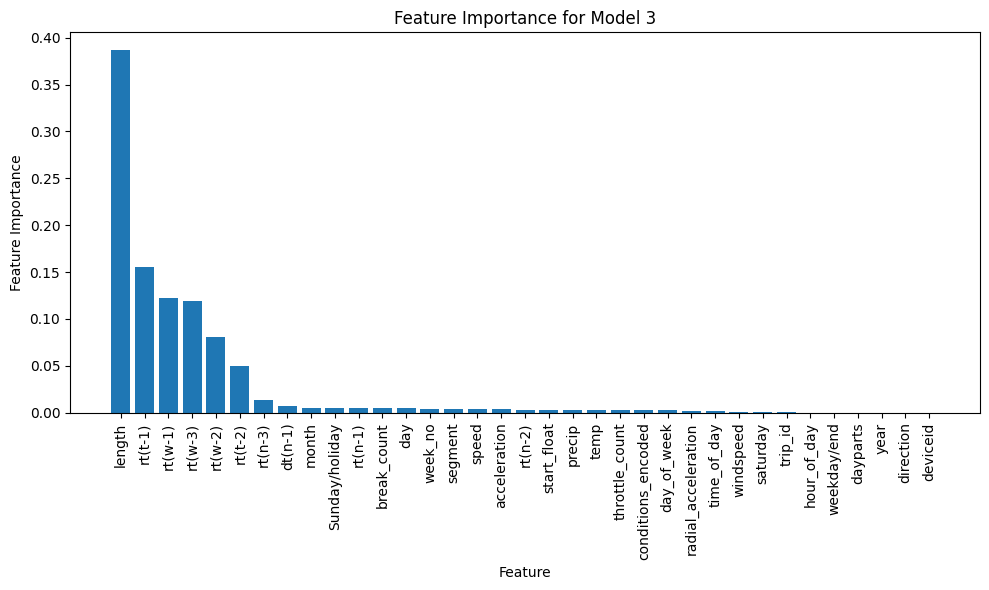

In [70]:
import matplotlib.pyplot as plt

# Get feature importances for Model 3
feature_importance3 = model3.feature_importances_

# Get the names of the features
feature_names3 = features3.columns

# Sort feature importances and feature names in descending order
sorted_idx3 = feature_importance3.argsort()[::-1]
feature_importance3 = feature_importance3[sorted_idx3]
feature_names3 = feature_names3[sorted_idx3]

# Create a bar graph for Model 3
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance3)), feature_importance3, align='center')
plt.xticks(range(len(feature_importance3)), feature_names3, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Model 3')
plt.tight_layout()
plt.show()


In [71]:
predicted_df3.to_csv('../DataOut/runtime_with_predictions.csv', index=False)

# XG boost with new features + Clusters

In [72]:
daf_with_features

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,conditions_encoded,start_float,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.663611,0,6.551622,-0.263065,0.289582,1.333333,0.333333
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,2021,4.0,6.703333,0,10.318498,-0.020071,0.876211,3.000000,1.000000
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.761667,0,9.510959,-0.306166,0.668537,7.500000,8.250000
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,2021,4.0,6.901111,0,12.014774,-0.072601,0.425698,3.250000,3.750000
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.955278,0,14.626720,-0.645813,0.374014,1.250000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100388,11205.0,513.0,1.0,11.0,145.0,1.1000,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.646111,1,11.085682,-0.358022,0.450297,2.567742,2.974194
100389,11205.0,513.0,1.0,12.0,146.0,1.3100,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31,10,22.2,0.0,4.3,0.0,2022,4.0,18.686389,1,11.666578,-0.357763,0.666164,3.058824,3.568627
100390,11205.0,513.0,1.0,13.0,149.0,1.1500,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31,10,22.2,0.0,4.3,7.0,2022,4.0,18.728889,1,10.933378,-0.493207,0.616278,2.470199,2.980132
100391,11205.0,513.0,1.0,14.0,80.0,0.8900,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.774444,1,11.332955,-0.294113,0.489491,1.697368,1.868421


In [73]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# models dictionary
models2 = {}

# Loop for Code Block 4
for df_tup in pivot_dfs:
    new_df_block4= pd.DataFrame()
    daf_with_clus_block4 = daf_with_features.copy()
    pivot_df_block4 = df_tup[0]
    cluster_method_block4 = df_tup[1]
    
    # Merge the dataframes using the device_id column for Code Block 4
    new_df_block4 = pd.merge(daf_with_clus_block4, pivot_df_block4, on='deviceid', how='inner')
    new_df_block4 = new_df_block4[new_df_block4['direction'] == 1]
    
    # Define features and target for Code Block 4
    features_block4 = new_df_block4.drop(['run_time_in_seconds'], axis=1)
    target_block4 = new_df_block4['run_time_in_seconds']
    
    model_block4,predictions_block4,predicted_df_block4,mae_block4,rmse_block4 ,mape4= train_Model(new_df_block4)
    
    models2[cluster_method_block4] = model_block4
    
    mae_rmse_dict[f"new features & {cluster_method_block4}"] = [mae_block4, rmse_block4,mape4,model_block4]
    
    print(f'Mean Absolute Error {cluster_method_block4} : {mae_block4}')
    print(f'Root Mean Square Error {cluster_method_block4} : {rmse_block4}')
    print(f'Mean Absolute Percentage Error {cluster_method_block4} : {mape4}')
mae_rmse_dict["skip 4"] = " "


Mean Absolute Error NormCluster : 29.65784856696978
Root Mean Square Error NormCluster : 49.10977513976747
Mean Absolute Percentage Error NormCluster : 17.391845779985672
Mean Absolute Error TSclusters km pca : 29.681489167095865
Root Mean Square Error TSclusters km pca : 49.0468116906714
Mean Absolute Percentage Error TSclusters km pca : 17.587158225220467
Mean Absolute Error TSclusters withdtw : 32.99664934548465
Root Mean Square Error TSclusters withdtw : 53.07645585900224
Mean Absolute Percentage Error TSclusters withdtw : 20.111666744616958
Mean Absolute Error TSclusters no dtw : 29.842671408666323
Root Mean Square Error TSclusters no dtw : 49.30660671575817
Mean Absolute Percentage Error TSclusters no dtw : 17.612832392014685
Mean Absolute Error TScluster_SDTW : 32.96132642030716
Root Mean Square Error TScluster_SDTW : 53.695974094866926
Mean Absolute Percentage Error TScluster_SDTW : 19.927401478876153
Mean Absolute Error NormCluster_new : 32.61464576992122
Root Mean Square Erro

In [74]:
pivot_dfs[2][0]

,deviceid,Cluster_3.0,Cluster_0.0,Cluster_2.0,Cluster_1.0
0,116,98,1.0,1.0,0.0
1,117,40,14.0,13.0,32.0
2,121,46,21.0,17.0,16.0
3,123,40,20.0,18.0,23.0
4,128,45,18.0,16.0,21.0
5,209,50,0.0,0.0,50.0
6,250,33,20.0,20.0,27.0
7,262,31,26.0,20.0,23.0


In [75]:
save_rn_df = daf_with_features.copy()
save_rn_df

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,conditions_encoded,start_float,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.663611,0,6.551622,-0.263065,0.289582,1.333333,0.333333
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,2021,4.0,6.703333,0,10.318498,-0.020071,0.876211,3.000000,1.000000
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.761667,0,9.510959,-0.306166,0.668537,7.500000,8.250000
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,2021,4.0,6.901111,0,12.014774,-0.072601,0.425698,3.250000,3.750000
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.955278,0,14.626720,-0.645813,0.374014,1.250000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100388,11205.0,513.0,1.0,11.0,145.0,1.1000,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.646111,1,11.085682,-0.358022,0.450297,2.567742,2.974194
100389,11205.0,513.0,1.0,12.0,146.0,1.3100,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31,10,22.2,0.0,4.3,0.0,2022,4.0,18.686389,1,11.666578,-0.357763,0.666164,3.058824,3.568627
100390,11205.0,513.0,1.0,13.0,149.0,1.1500,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31,10,22.2,0.0,4.3,7.0,2022,4.0,18.728889,1,10.933378,-0.493207,0.616278,2.470199,2.980132
100391,11205.0,513.0,1.0,14.0,80.0,0.8900,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.774444,1,11.332955,-0.294113,0.489491,1.697368,1.868421


In [76]:
# Merge the dataframes using the device_id column for Code Block 4
save_rn_df = pd.merge(save_rn_df, pivot_dfs[2][0], on='deviceid', how='inner')
save_rn_df = save_rn_df[save_rn_df['direction'] == 1]

In [77]:
save_rn_df

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,conditions_encoded,start_float,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count,Cluster_3.0,Cluster_0.0,Cluster_2.0,Cluster_1.0
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,4.0,6.663611,0,6.551622,-0.263065,0.289582,1.333333,0.333333,31,26.0,20.0,23.0
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.000,6.1,74.0,2021,4.0,6.703333,0,10.318498,-0.020071,0.876211,3.000000,1.000000,31,26.0,20.0,23.0
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,4.0,6.761667,0,9.510959,-0.306166,0.668537,7.500000,8.250000,31,26.0,20.0,23.0
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.000,6.1,6.0,2021,4.0,6.901111,0,12.014774,-0.072601,0.425698,3.250000,3.750000,31,26.0,20.0,23.0
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.000,6.1,0.0,2021,4.0,6.955278,0,14.626720,-0.645813,0.374014,1.250000,1.000000,31,26.0,20.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40742,4262.0,209.0,1.0,11.0,210.0,1.1000,2.0,8.00,0.0,0,1,27.0,216.0,216.0,216.0,216.0,216.0,272.0,49.0,117.0,8.0,20,7,23.3,0.001,0.0,91.0,2022,1.0,8.237500,1,10.430567,-0.233958,0.396812,2.750000,3.500000,50,0.0,0.0,50.0
40743,4262.0,209.0,1.0,12.0,250.0,1.3100,2.0,8.25,0.0,0,1,27.0,190.0,190.0,190.0,270.0,190.0,210.0,272.0,49.0,8.0,20,7,23.3,0.001,0.0,15.0,2022,1.0,8.300000,1,10.374892,-0.228928,0.554605,3.500000,3.750000,50,0.0,0.0,50.0
40744,4262.0,209.0,1.0,13.0,179.0,1.1500,2.0,8.25,0.0,0,1,27.0,152.0,152.0,152.0,181.0,152.0,250.0,210.0,272.0,8.0,20,7,23.3,0.001,0.0,15.0,2022,1.0,8.373611,1,12.608890,-0.229222,0.703102,2.750000,3.000000,50,0.0,0.0,50.0
40745,4262.0,209.0,1.0,14.0,157.0,0.8900,2.0,8.25,0.0,0,1,27.0,124.0,124.0,124.0,106.0,124.0,179.0,250.0,210.0,8.0,20,7,23.3,0.001,0.0,15.0,2022,1.0,8.427500,1,11.245835,-0.681150,0.512195,2.000000,1.750000,50,0.0,0.0,50.0


In [78]:
# save csv
save_rn_df.to_csv(f'../DataOut/df_for_runningTime.csv', index=False)

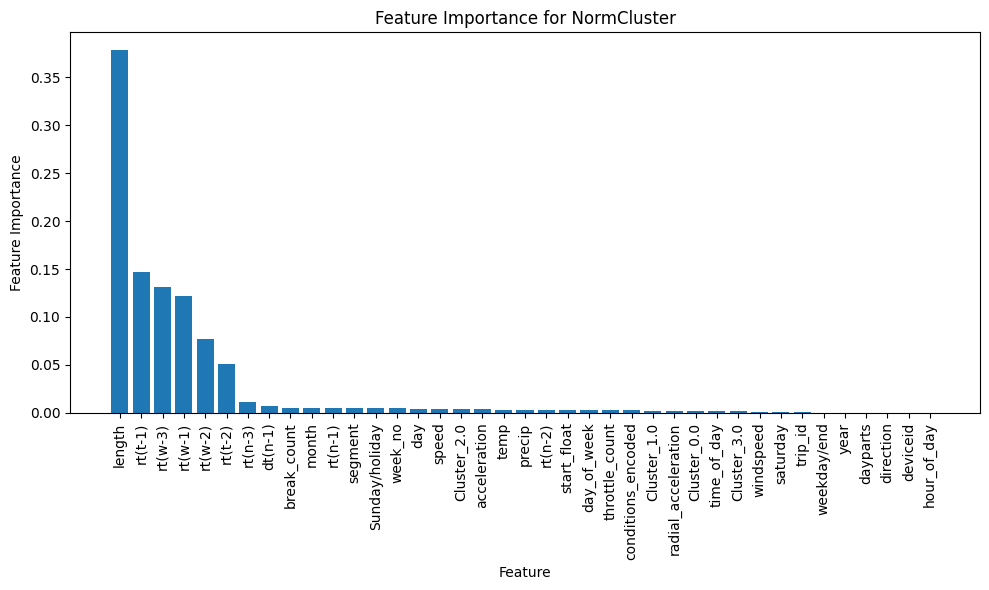

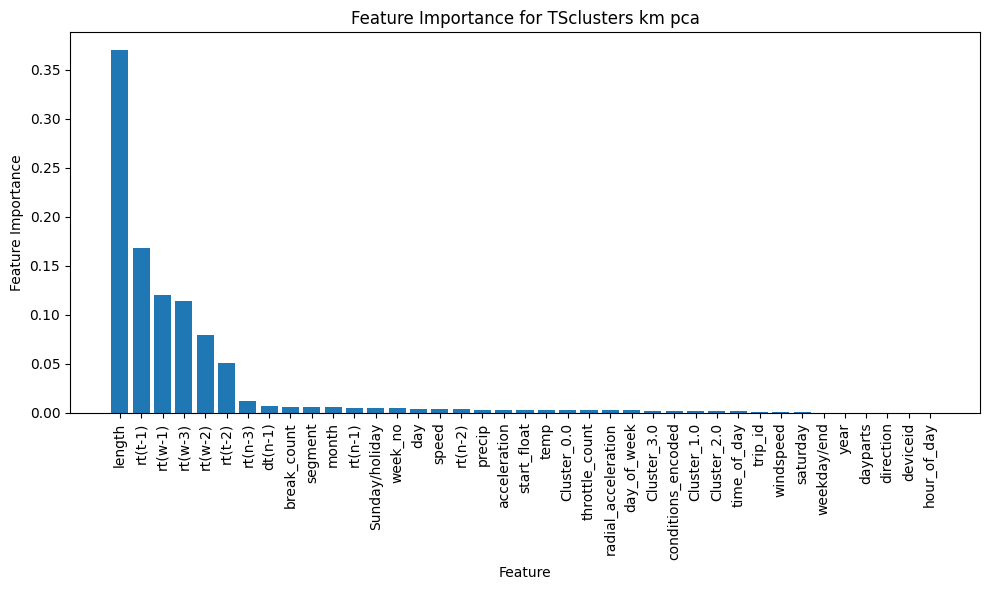

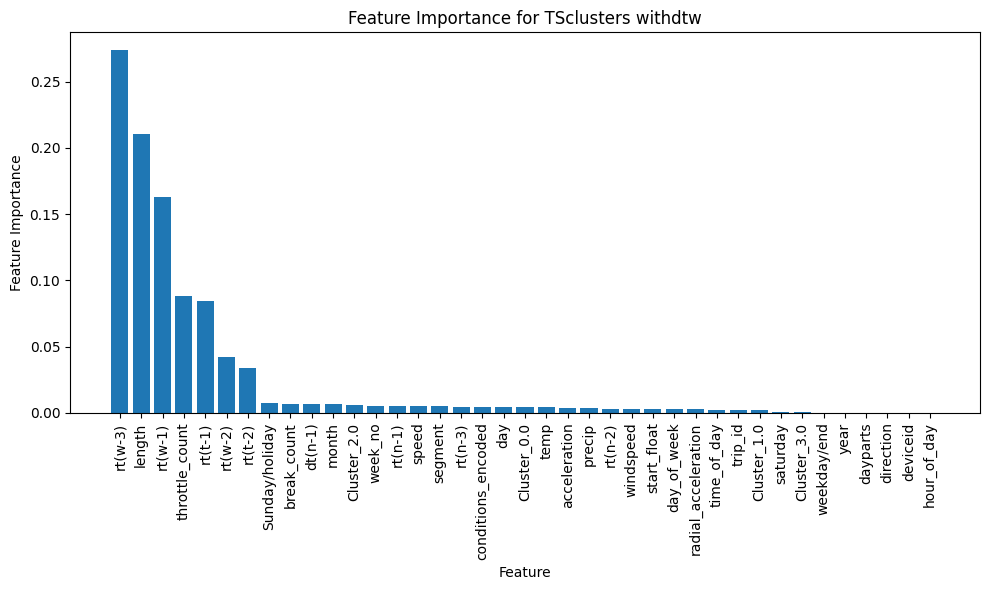

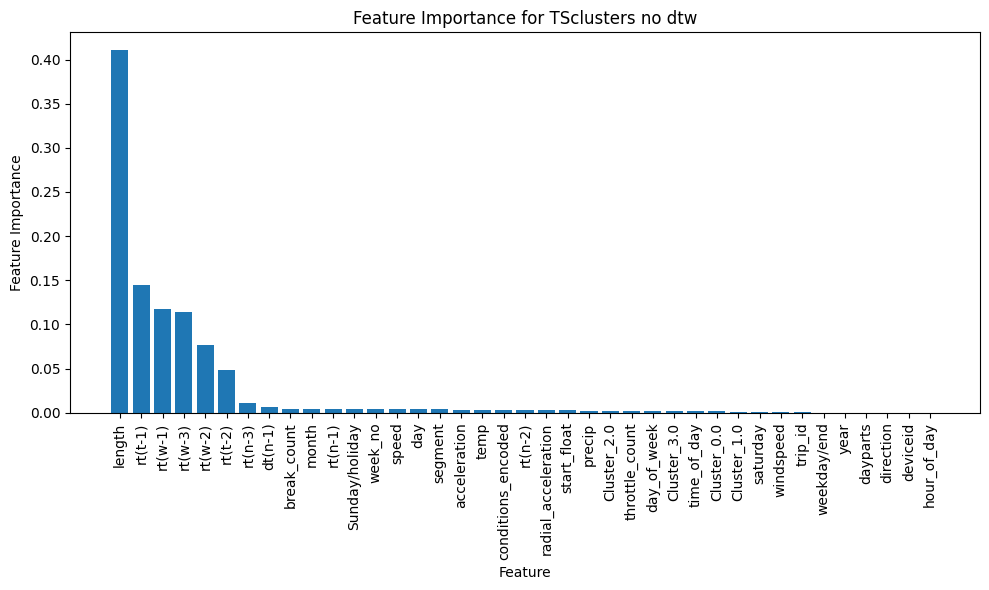

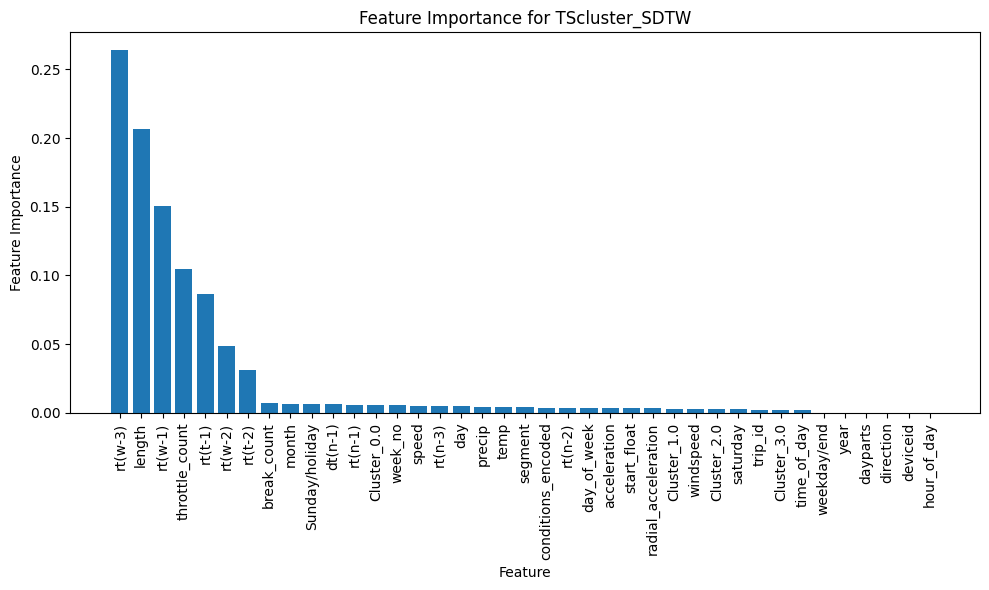

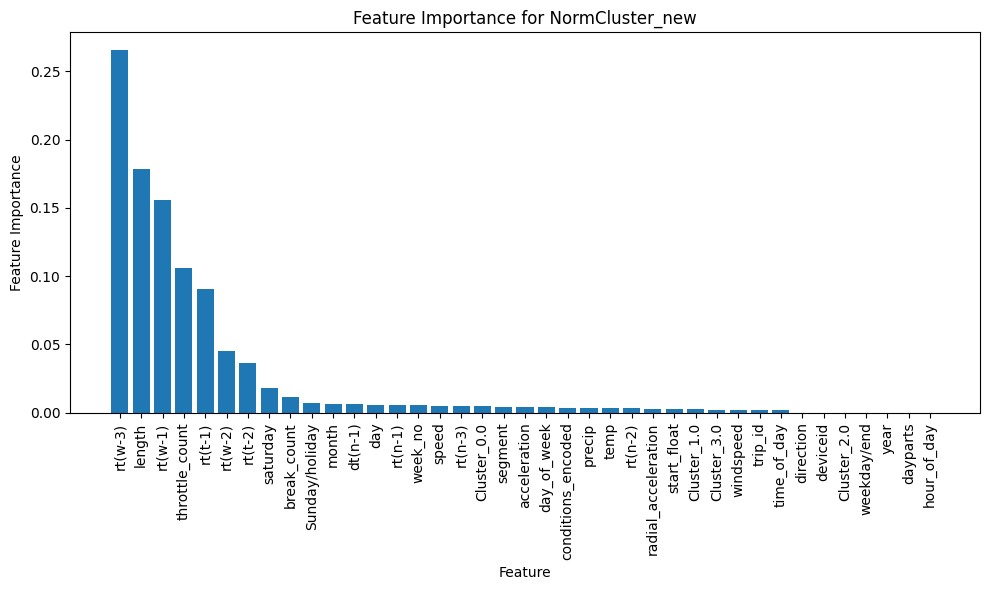

In [79]:
import matplotlib.pyplot as plt

for modelname, model in models2.items():
    # Get feature importances for Model 2
    feature_importance2 = model.feature_importances_

    # Get the names of the features
    feature_names2 = features_block4.columns

    # Sort feature importances and feature names in descending order
    sorted_idx2 = feature_importance2.argsort()[::-1]
    feature_importance2 = feature_importance2[sorted_idx2]
    feature_names2 = feature_names2[sorted_idx2]

    # Create a bar graph for Model 2
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance2)), feature_importance2, align='center')
    plt.xticks(range(len(feature_importance2)), feature_names2, rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Feature Importance')
    plt.title(f'Feature Importance for {modelname}')
    plt.tight_layout()
    plt.show()


# XG boost with new features + Clusters - PCAd

In [80]:
daf_with_features

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,conditions_encoded,start_float,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count
0,4890.0,262.0,1.0,1.0,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.663611,0,6.551622,-0.263065,0.289582,1.333333,0.333333
1,4890.0,262.0,1.0,2.0,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1,10,20.0,0.0,6.1,74.0,2021,4.0,6.703333,0,10.318498,-0.020071,0.876211,3.000000,1.000000
2,4890.0,262.0,1.0,3.0,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.761667,0,9.510959,-0.306166,0.668537,7.500000,8.250000
3,4890.0,262.0,1.0,4.0,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1,10,20.0,0.0,6.1,6.0,2021,4.0,6.901111,0,12.014774,-0.072601,0.425698,3.250000,3.750000
4,4890.0,262.0,1.0,5.0,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1,10,20.0,0.0,6.1,0.0,2021,4.0,6.955278,0,14.626720,-0.645813,0.374014,1.250000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100388,11205.0,513.0,1.0,11.0,145.0,1.1000,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.646111,1,11.085682,-0.358022,0.450297,2.567742,2.974194
100389,11205.0,513.0,1.0,12.0,146.0,1.3100,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31,10,22.2,0.0,4.3,0.0,2022,4.0,18.686389,1,11.666578,-0.357763,0.666164,3.058824,3.568627
100390,11205.0,513.0,1.0,13.0,149.0,1.1500,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31,10,22.2,0.0,4.3,7.0,2022,4.0,18.728889,1,10.933378,-0.493207,0.616278,2.470199,2.980132
100391,11205.0,513.0,1.0,14.0,80.0,0.8900,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.774444,1,11.332955,-0.294113,0.489491,1.697368,1.868421


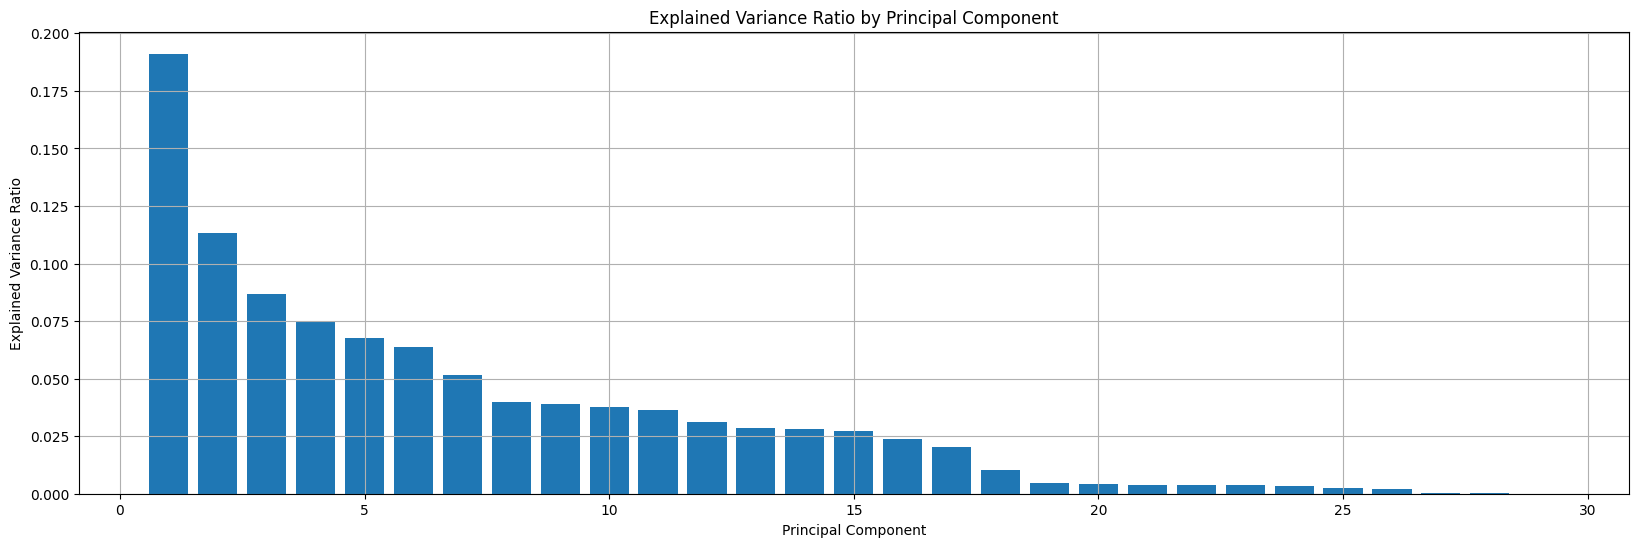

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'df' with the features
# Select the features for PCA (exclude non-numeric and target columns)
features = df.drop(['run_time_in_seconds'], axis=1)

# Standardize the features (important for PCA)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA
n_components = min(features_scaled.shape[0], features_scaled.shape[1])
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA components and 'run_time_in_seconds'
pca_df = pd.DataFrame(principal_components, columns=[f'PCA_{i+1}' for i in range(n_components)])

# Ensure the index of pca_df matches the index of df
pca_df.index = df.index

# Add 'run_time_in_seconds' to pca_df
pca_df['run_time_in_seconds'] = df['run_time_in_seconds']

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(20, 6))
plt.bar(range(1, n_components + 1, 1), explained_variance_ratio, alpha=1, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)
plt.show()


In [82]:
pca_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,run_time_in_seconds
0,-2.261055,2.671251,-0.709856,2.083835,-2.347345,-0.056180,-0.101404,-0.548936,0.922767,0.451590,-1.182037,0.163023,-0.097450,-0.154823,-0.972060,0.618113,-0.821338,-0.913968,-0.011579,-0.000181,0.442590,-0.041797,0.045972,0.083215,0.079629,-0.391392,0.122823,-0.028600,-0.006501,69.0
1,1.051262,2.616889,-0.697285,2.197506,-2.437639,0.079907,-0.221292,-0.248840,1.083955,1.210056,0.430146,-0.077650,-0.365538,-0.527434,-0.901407,0.297255,-1.029491,-0.907351,0.016745,0.001222,0.298588,-0.026687,0.022076,0.053668,0.079169,-0.186670,0.120906,-0.033677,-0.013517,210.0
2,6.393438,2.503310,-0.659378,2.144510,-2.588320,-0.026844,-0.052381,-0.105521,0.902853,0.752673,-0.894861,0.006140,-0.159269,1.680595,-1.361852,0.498669,-0.946497,-0.909890,-0.012838,0.008257,0.680949,-0.057173,0.083276,0.118796,0.079046,0.142451,0.109953,-0.063988,0.023521,496.0
3,0.334845,2.676620,-0.700753,2.072012,-1.470330,0.092703,-0.089674,0.786236,0.794818,0.796626,-1.880012,1.926770,1.543518,-0.691386,-0.631013,0.118308,-1.102817,-0.908261,0.078660,-0.010352,-0.410897,0.044245,-0.073204,-0.086971,0.075164,-0.198145,0.117356,-0.078085,-0.003204,195.0
4,-1.439059,2.670388,-0.708028,2.027369,-1.499750,0.026102,-0.185225,1.752132,0.818564,1.596156,-0.468742,0.823297,-1.144693,-1.269244,-1.120599,0.385247,-1.025630,-0.910417,0.051522,-0.000714,-0.128707,0.010582,-0.033169,-0.029428,0.074664,-0.014256,0.111724,-0.086277,-0.012350,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197627,-1.428873,-2.135276,-1.482662,-0.952203,1.813919,-1.575523,0.000924,-0.601713,-1.043309,-1.740318,0.508024,-0.500280,-1.331058,0.509100,0.621496,-1.229402,-1.047404,0.792384,-0.038168,0.030677,0.039496,0.005733,-0.121478,-0.008376,-0.153155,-0.173628,-0.022474,-0.068747,0.023095,99.0
197628,0.587357,-2.163305,-1.467988,-0.911265,1.711186,-1.533874,0.048624,-1.340946,-1.012973,-2.108668,0.167237,-0.389561,-0.770087,0.524645,0.759742,-1.254597,-1.044823,0.793315,-0.035585,0.029650,-0.002631,0.012547,-0.129599,-0.019530,-0.152740,-0.150527,-0.020311,-0.071654,0.017085,165.0
197629,4.374581,-2.202649,-1.441830,-0.847385,1.708407,-1.437098,0.091517,-1.873655,-0.980464,-2.317649,-0.065070,0.095933,-0.337264,-0.530180,1.034489,-1.381010,-1.111244,0.795848,0.003530,0.025623,-0.471483,0.059983,-0.197971,-0.110855,-0.154309,-0.213723,-0.016827,-0.077102,0.006566,337.0
197630,-2.643491,-2.063971,-1.498871,-0.984781,2.559396,-1.482517,-0.019634,0.208293,-1.121459,-1.600875,-0.048788,0.642078,0.173569,0.327598,0.943543,-1.550526,-1.191599,0.794042,-0.035503,0.025046,0.341180,-0.021653,-0.077885,0.038969,-0.151461,0.233333,-0.029245,-0.088225,-0.011194,46.0


In [83]:
# import xgboost as xgb
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Models dictionary
# models = {}

# # Loop for Code Block 5
# for df_tup in pivot_dfs:
#     pca_df_copy = pca_df.copy()
#     pivot_df = df_tup[0]
#     cluster_method = df_tup[1]
    
#     # Define features and target
#     features = pca_df_copy.drop(['run_time_in_seconds'], axis=1)
#     target = pca_df_copy['run_time_in_seconds']
    
#     model, predictions, predicted_df, mae, rmse, mape = train_Model(pca_df_copy)
    
#     models[cluster_method] = model
    
#     mae_rmse_dict[f'new_features_{cluster_method}_PCA'] = [mae, rmse, mape,model]
    
#     print(f'Mean Absolute Error {cluster_method}: {mae}')
#     print(f'Root Mean Square Error {cluster_method}: {rmse}')
#     print(f'Mean Absolute Percentage Error {cluster_method}: {mape}')
    
# mae_rmse_dict['skip_5'] = " "


In [84]:
# import matplotlib.pyplot as plt

# for model in models2:

#     # Get feature importances for Model 2
#     feature_importance2 = model2.feature_importances_

#     # Get the names of the features
#     feature_names2 = features2.columns

#     # Sort feature importances and feature names in descending order
#     sorted_idx2 = feature_importance2.argsort()[::-1]
#     feature_importance2 = feature_importance2[sorted_idx2]
#     feature_names2 = feature_names2[sorted_idx2]

#     # Create a bar graph for Model 2
#     plt.figure(figsize=(10, 6))
#     plt.bar(range(len(feature_importance2)), feature_importance2, align='center')
#     plt.xticks(range(len(feature_importance2)), feature_names2, rotation=90)
#     plt.xlabel('Feature')
#     plt.ylabel('Feature Importance')
#     plt.title(f'Feature Importance for {model}')
#     plt.tight_layout()
#     plt.show()


# Summery

In [85]:
# print mae and rmse for all models and get the best model
best_model = None
best_mae = None
best_rmse = None
for key, value in mae_rmse_dict.items():
    if key == "skip 1" or key == "skip 2" or key == "skip 3" or key == "skip 4" or key == "skip_5": 
        print(" ")
    else:
        print(f"{key} : MAE: {value[0]}, RMSE: {value[1]} , MAPE: {value[2]}")
        if best_model == None:
            best_model = key
            best_mae = value[0]
            best_rmse = value[1]
            best_mape = value[2]
        else:
            if value[0] < best_mae:
                best_model_name = key
                best_mae = value[0]
                best_rmse = value[1]
                best_mape = value[2]
                best_model= value[3]
                
print(" ")
print(f"Best model : {best_model_name} , MAE: {best_mae}, RMSE: {best_rmse} , MAPE: {best_mape}")
    
    

without clusters : MAE: 30.142899110558915, RMSE: 49.810205742015455 , MAPE: 17.730727515996296
 
with segment clusters : MAE: 29.462383387431622, RMSE: 49.08387375557081 , MAPE: 17.18719146902769
with segment clusters with features : MAE: 29.177174717317, RMSE: 48.35050991791467 , MAPE: 17.35873979872216
NormCluster with clusters : MAE: 29.928383145685064, RMSE: 49.49565483789443 , MAPE: 17.540648996145254
TSclusters km pca with clusters : MAE: 30.141396533704786, RMSE: 50.04765509964148 , MAPE: 17.60257079687164
TSclusters withdtw with clusters : MAE: 33.14999006661502, RMSE: 53.830964830868886 , MAPE: 19.835052874330092
TSclusters no dtw with clusters : MAE: 30.234525926563837, RMSE: 49.851330806584585 , MAPE: 17.83853573033533
TScluster_SDTW with clusters : MAE: 33.51494017839432, RMSE: 55.15118498513271 , MAPE: 20.517664692000555
NormCluster_new with clusters : MAE: 33.02250117497011, RMSE: 53.79755544456402 , MAPE: 19.850060246914143
 
with new features : MAE: 29.675764895818006,

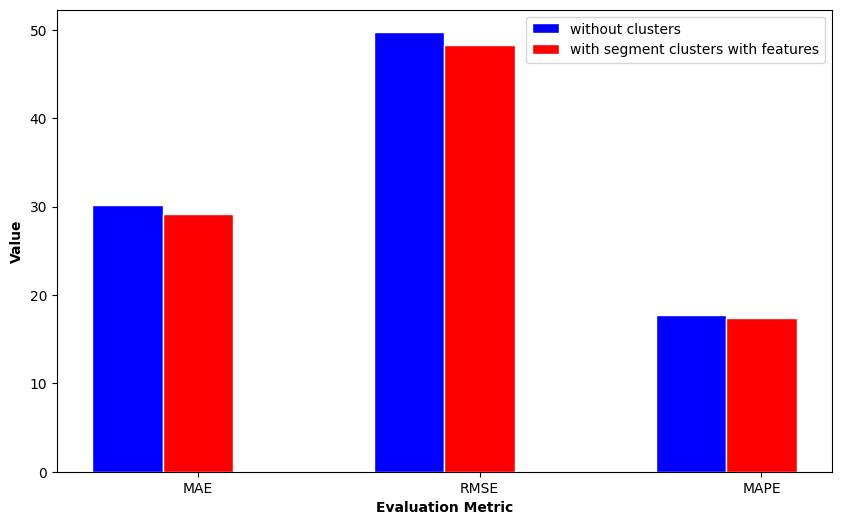

In [86]:
# draw the difference between MAE,RMSE and MAPE for best model vs the without clusters model on a side by side bar chart
import matplotlib.pyplot as plt
import numpy as np

# set width of bar

barWidth = 0.25

# set height of bar

bars1 = [mae_rmse_dict["without clusters"][0],mae_rmse_dict["without clusters"][1],mae_rmse_dict["without clusters"][2]]
bars2 = [mae_rmse_dict[best_model_name][0],mae_rmse_dict[best_model_name][1],mae_rmse_dict[best_model_name][2]]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='without clusters')
plt.bar(r2, bars2, color='red', width=barWidth, edgecolor='white', label=best_model_name)

# Add xticks on the middle of the group bars
plt.xlabel('Evaluation Metric', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['MAE', 'RMSE', 'MAPE'])

# Create legend & Show graphic
plt.legend()
plt.show()




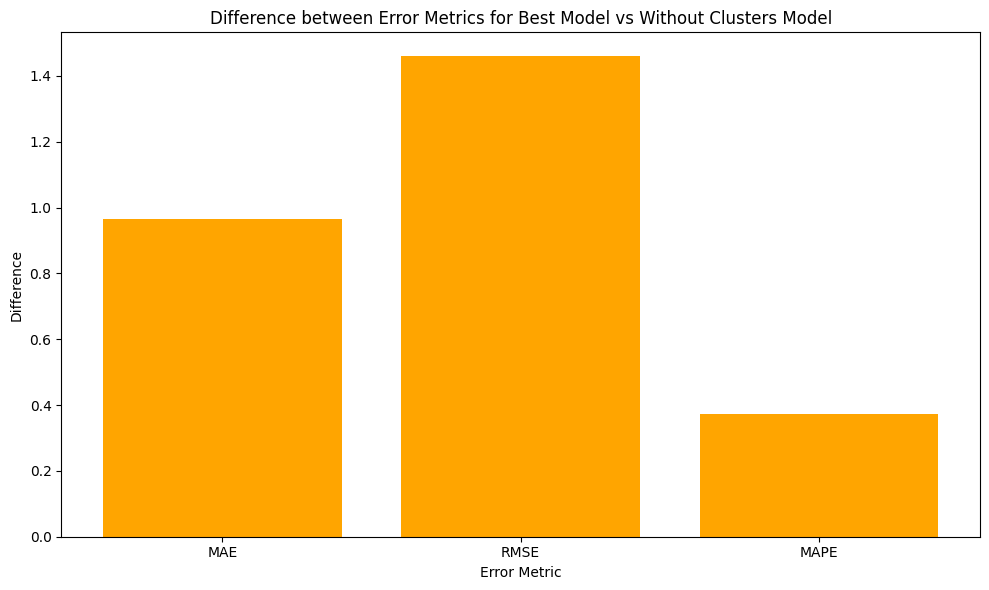

In [87]:
# draw the difference between MAE,RMSE and MAPE for best model vs the without clusters model on a multi bar graph with the 3 values for the difference of each error metric for each model.

# get the difference between MAE,RMSE and MAPE for best model vs the without clusters model
mae_diff = mae_rmse_dict['without clusters'][0] - mae_rmse_dict[best_model_name][0]
rmse_diff = mae_rmse_dict['without clusters'][1] - mae_rmse_dict[best_model_name][1]
mape_diff = mae_rmse_dict['without clusters'][2] - mae_rmse_dict[best_model_name][2]

# create a dataframe with the difference between MAE,RMSE and MAPE for best model vs the without clusters model
diff_df = pd.DataFrame({'Error Metric': ['MAE', 'RMSE', 'MAPE'],
                        'Difference': [mae_diff, rmse_diff, mape_diff]})
diff_df

# Create a bar graph for the difference between MAE,RMSE and MAPE for best model vs the without clusters model
plt.figure(figsize=(10, 6))
plt.bar(diff_df['Error Metric'], diff_df['Difference'], align='center',color='orange')
plt.xlabel('Error Metric')
plt.ylabel('Difference')
plt.title('Difference between Error Metrics for Best Model vs Without Clusters Model')
plt.tight_layout()
plt.show()


In [88]:
# export best xgboost model
import pickle
pickle.dump(best_model, open('../DataOut/runningtime_model.sav', 'wb'))

In [89]:
# without clusters : MAE: 32.854974080215804, RMSE: 53.20377299850515 , MAPE: 19.534628207221928
 
# NormCluster with clusters : MAE: 33.05988186597824, RMSE: 53.573185590251704 , MAPE: 19.967093737734146
# TSclusters km pca with clusters : MAE: 32.788062356276946, RMSE: 53.02307602052399 , MAPE: 19.70150720388855
# TSclusters withdtw with clusters : MAE: 33.38751918402585, RMSE: 54.30396772010321 , MAPE: 20.23589228696799
# TSclusters no dtw with clusters : MAE: 33.41819931973111, RMSE: 54.847581014302435 , MAPE: 20.216386250304488
 
# with new features : MAE: 32.91758814128963, RMSE: 53.53230300872621 , MAPE: 19.5744479400024
 
# new features & NormCluster : MAE: 33.22776805866848, RMSE: 54.034500676028266 , MAPE: 20.0179712689814
# new features & TSclusters km pca : MAE: 32.91771865378727, RMSE: 53.620087090412476 , MAPE: 19.670564224806995
# new features & TSclusters withdtw : MAE: 32.82193614786321, RMSE: 53.07478501754382 , MAPE: 19.417778202743612
# new features & TSclusters no dtw : MAE: 32.741482772068544, RMSE: 53.675522654151195 , MAPE: 19.27186908664591
 
 
# Best model : new features & TSclusters no dtw , MAE: 32.741482772068544, RMSE: 53.675522654151195 , MAPE: 19.27186908664591

In [90]:
predicted_df3

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),year,conditions_encoded,start_float,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count,predicted_run_time
91268,1511.0,117.0,1.0,1.0,75.0,0.63,0.0,6.50,0.0,0,1,39.0,130.0,100.0,113.0,113.0,113.0,113.0,113.0,113.0,6.0,10,10,19.7,0.0,4.0,0.0,2022,4.0,6.510556,0,6.344489,-0.322849,0.351416,1.000000,1.000000,107.126953
91269,1511.0,117.0,1.0,2.0,321.0,1.28,0.0,6.50,0.0,0,1,39.0,270.0,207.0,279.0,279.0,279.0,75.0,279.0,279.0,6.0,10,10,19.7,0.0,4.0,42.0,2022,4.0,6.543056,0,8.279345,-0.010563,0.634614,1.000000,1.000000,251.358856
91270,1511.0,117.0,1.0,3.0,523.0,2.11,0.0,6.50,0.0,0,1,39.0,537.0,480.0,445.0,487.0,487.0,321.0,75.0,487.0,6.0,10,10,19.7,0.0,4.0,15.0,2022,4.0,6.636389,0,7.863126,-0.089699,0.510328,7.000000,8.000000,558.478821
91271,1511.0,117.0,1.0,4.0,211.0,1.55,0.0,6.75,0.0,0,1,39.0,201.0,197.0,209.0,209.0,209.0,523.0,321.0,75.0,6.0,10,10,19.7,0.0,4.0,68.0,2022,4.0,6.800556,0,9.098285,0.066004,0.322768,5.000000,6.000000,210.555420
91272,1511.0,117.0,1.0,5.0,123.0,0.84,0.0,6.75,0.0,0,1,39.0,108.0,100.0,130.0,130.0,130.0,211.0,523.0,321.0,6.0,10,10,19.7,0.0,4.0,0.0,2022,4.0,6.859167,0,15.658757,-0.237839,0.335279,1.000000,0.000000,119.851768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100388,11205.0,513.0,1.0,11.0,145.0,1.10,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.646111,1,11.085682,-0.358022,0.450297,2.567742,2.974194,167.333771
100389,11205.0,513.0,1.0,12.0,146.0,1.31,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31,10,22.2,0.0,4.3,0.0,2022,4.0,18.686389,1,11.666578,-0.357763,0.666164,3.058824,3.568627,141.914551
100390,11205.0,513.0,1.0,13.0,149.0,1.15,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31,10,22.2,0.0,4.3,7.0,2022,4.0,18.728889,1,10.933378,-0.493207,0.616278,2.470199,2.980132,121.099182
100391,11205.0,513.0,1.0,14.0,80.0,0.89,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31,10,22.2,0.0,4.3,15.0,2022,4.0,18.774444,1,11.332955,-0.294113,0.489491,1.697368,1.868421,114.972443


In [91]:
predicted_df1

,trip_id,deviceid,direction,segment,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,dt(n-1),Kmeans_cluster,year,conditions_encoded,start_float,dayparts,speed,acceleration,radial_acceleration,throttle_count,break_count,predicted_run_time
172069,1511.0,117.0,1.0,1.0,75.0,0.63,0.0,6.50,0.0,0,1,39.0,130.0,100.0,113.0,113.0,113.0,113.0,113.0,113.0,6.0,10,10,19.7,0.0,4.0,0.0,2.0,2022,4.0,6.510556,0,6.344489,-0.322849,0.351416,1.000000,1.000000,109.933044
172070,1511.0,117.0,1.0,2.0,321.0,1.28,0.0,6.50,0.0,0,1,39.0,270.0,207.0,279.0,279.0,279.0,75.0,279.0,279.0,6.0,10,10,19.7,0.0,4.0,42.0,2.0,2022,4.0,6.543056,0,8.279345,-0.010563,0.634614,1.000000,1.000000,264.568481
172071,1511.0,117.0,1.0,3.0,523.0,2.11,0.0,6.50,0.0,0,1,39.0,537.0,480.0,445.0,487.0,487.0,321.0,75.0,487.0,6.0,10,10,19.7,0.0,4.0,15.0,2.0,2022,4.0,6.636389,0,7.863126,-0.089699,0.510328,7.000000,8.000000,522.923584
172072,1511.0,117.0,1.0,4.0,211.0,1.55,0.0,6.75,0.0,0,1,39.0,201.0,197.0,209.0,209.0,209.0,523.0,321.0,75.0,6.0,10,10,19.7,0.0,4.0,68.0,2.0,2022,4.0,6.800556,0,9.098285,0.066004,0.322768,5.000000,6.000000,218.703964
172073,1511.0,117.0,1.0,5.0,123.0,0.84,0.0,6.75,0.0,0,1,39.0,108.0,100.0,130.0,130.0,130.0,211.0,523.0,321.0,6.0,10,10,19.7,0.0,4.0,0.0,2.0,2022,4.0,6.859167,0,15.658757,-0.237839,0.335279,1.000000,0.000000,123.021309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181758,11205.0,513.0,1.0,11.0,145.0,1.10,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31,10,22.2,0.0,4.3,15.0,2.0,2022,4.0,18.646111,1,11.085682,-0.358022,0.450297,2.567742,2.974194,182.287399
181759,11205.0,513.0,1.0,12.0,146.0,1.31,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31,10,22.2,0.0,4.3,0.0,3.0,2022,4.0,18.686389,1,11.666578,-0.357763,0.666164,3.058824,3.568627,136.111526
181760,11205.0,513.0,1.0,13.0,149.0,1.15,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31,10,22.2,0.0,4.3,7.0,2.0,2022,4.0,18.728889,1,10.933378,-0.493207,0.616278,2.470199,2.980132,132.272110
181761,11205.0,513.0,1.0,14.0,80.0,0.89,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31,10,22.2,0.0,4.3,15.0,2.0,2022,4.0,18.774444,1,11.332955,-0.294113,0.489491,1.697368,1.868421,121.912994


In [92]:
best_matching_trip_id = None
best_matching_trip_id_mape = float('inf')  # Initialize with a high value
least_matching_trip_id = None
least_matching_trip_id_mape = 0  # Initialize with a low value

for trip_id in predicted_df3['trip_id'].unique():
    trip_id_df = predicted_df3[predicted_df3['trip_id'] == trip_id]
    trip_id_df['difference'] = abs(trip_id_df['predicted_run_time'] - trip_id_df['run_time_in_seconds'])
    trip_id_df['difference_percentage'] = (trip_id_df['difference'] / trip_id_df['run_time_in_seconds']) * 100
    avg_mape = trip_id_df['difference_percentage'].mean()

    if avg_mape < best_matching_trip_id_mape:
        best_matching_trip_id = trip_id
        best_matching_trip_id_mape = avg_mape

    if avg_mape > least_matching_trip_id_mape:
        least_matching_trip_id = trip_id
        least_matching_trip_id_mape = avg_mape

print(f'Trip ID with Best Matching Predictions: {best_matching_trip_id} (MAPE: {best_matching_trip_id_mape:.2f}%)')
print(f'Trip ID with Least Matching Predictions: {least_matching_trip_id} (MAPE: {least_matching_trip_id_mape:.2f}%)')


C:\Users\gw\AppData\Local\Temp\ipykernel_40228\991823158.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_id_df['difference'] = abs(trip_id_df['predicted_run_time'] - trip_id_df['run_time_in_seconds'])
C:\Users\gw\AppData\Local\Temp\ipykernel_40228\991823158.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_id_df['difference_percentage'] = (trip_id_df['difference'] / trip_id_df['run_time_in_seconds']) * 100
C:\Users\gw\AppData\Local\Temp\ipykernel_40228\991823158.py:8: SettingWithCopyWarning:

Trip ID with Best Matching Predictions: 8982.0 (MAPE: 7.13%)
Trip ID with Least Matching Predictions: 5899.0 (MAPE: 42.75%)


C:\Users\gw\AppData\Local\Temp\ipykernel_40228\991823158.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_id_df['difference'] = abs(trip_id_df['predicted_run_time'] - trip_id_df['run_time_in_seconds'])
C:\Users\gw\AppData\Local\Temp\ipykernel_40228\991823158.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip_id_df['difference_percentage'] = (trip_id_df['difference'] / trip_id_df['run_time_in_seconds']) * 100
C:\Users\gw\AppData\Local\Temp\ipykernel_40228\991823158.py:8: SettingWithCopyWarning:

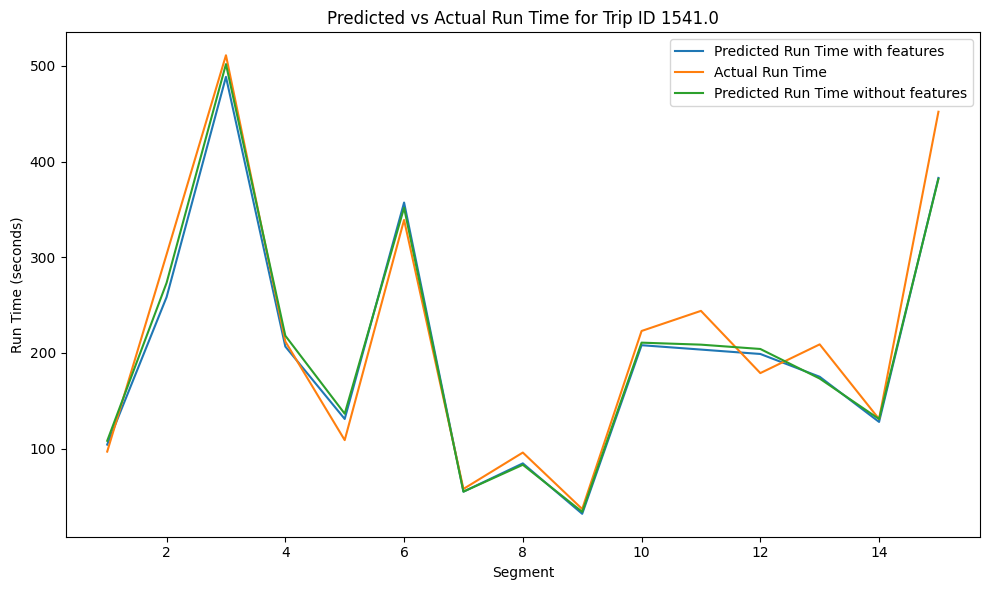

In [93]:
# draw a predicted time vs actual running time line graph for the best model and the without clusters model for the same trip id
import matplotlib.pyplot as plt

# Get the trip id
trip_id = 1541.0 

# Get the predicted run time for the trip id
predicted_run_time = predicted_df3[predicted_df3['trip_id'] == trip_id]['predicted_run_time']

Pred_without_features = predicted_df1[predicted_df1['trip_id'] == trip_id]['predicted_run_time']

# Get the actual run time for the trip id
actual_run_time = predicted_df3[predicted_df3['trip_id'] == trip_id]['run_time_in_seconds']

# Get the x-axis values (e.g., segment numbers)
x_values = predicted_df3[predicted_df3['trip_id'] == trip_id]['segment'].unique()

# Create a line graph for the predicted and actual run times with custom x-axis values
plt.figure(figsize=(10, 6))
plt.plot(x_values, predicted_run_time, label='Predicted Run Time with features')
plt.plot(x_values, actual_run_time, label='Actual Run Time')
plt.plot(x_values, Pred_without_features, label='Predicted Run Time without features')
plt.xlabel('Segment')
plt.ylabel('Run Time (seconds)')
plt.title(f'Predicted vs Actual Run Time for Trip ID {trip_id}')
plt.legend()
plt.tight_layout()
plt.show()

